# Tarea 1

Juan Pablo Rodas carnet 23007421

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [322]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [323]:
dataHP_Final = dataHP

## Imputacion

se filtraran las columnas que tienen mas de un 5% de valores null en ellas

In [324]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean() <= 0.05)]
len(cols_rescatables)

70

In [325]:
dataHP_Final = dataHP[cols_rescatables].copy()

de las columnas rescatables cuales son las que aun tienen nulls

In [326]:
cols_con_na = [col for col in cols_rescatables if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

se observa el tipo de datos de las columnas sobre las que se hara la imputacion

In [327]:
dataHP[cols_con_na].dtypes

MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
dtype: object

### Imputacion para datos numericos

In [328]:
dataHP['MasVnrArea'].isnull().mean()

0.005479452054794521

In [329]:
media = dataHP['MasVnrArea'].mean()
mediana = dataHP['MasVnrArea'].median()

print(media)
print(mediana)

103.68526170798899
0.0


In [330]:
dataHP_num = pd.DataFrame()

dataHP_num['MasVnrArea']=dataHP['MasVnrArea']
dataHP_num['MasVnrArea_Mean'] = np.round(dataHP['MasVnrArea'].fillna(media))
dataHP_num['MasVnrArea_Median'] = np.round(dataHP['MasVnrArea'].fillna(mediana))

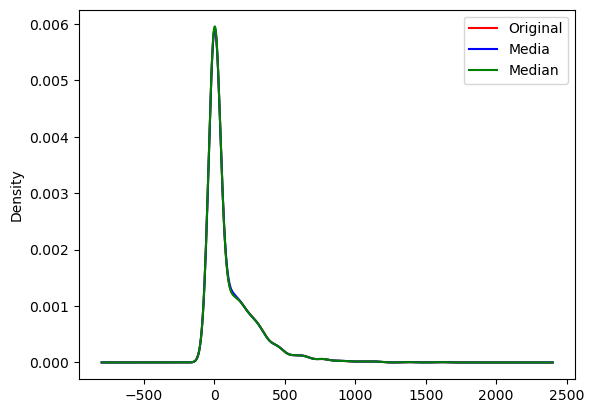

In [331]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP_num['MasVnrArea'].plot.density(color='red', label='Original')
dataHP_num['MasVnrArea_Mean'].plot.density(color='blue', label='Media')
dataHP_num['MasVnrArea_Median'].plot.density(color='green', label='Median')
plt.legend()

no hay mayor diferencia entre hacer una pintutacion con media o mediana, por lo que se hara una imputacion por media en el dataset final

In [332]:
dataHP_Final['MasVnrArea'] = np.round(dataHP_Final['MasVnrArea'].fillna(media))

In [333]:
dataHP_Final['MasVnrArea'].isnull().mean()

0.0

### Imputacion para variables categoricas

#### MasVnrType

In [334]:
cat_varName = 'MasVnrType'

In [335]:
dataHP[cat_varName].isnull().mean()

0.005479452054794521

In [336]:
dataHP[cat_varName].value_counts()/len(dataHP)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

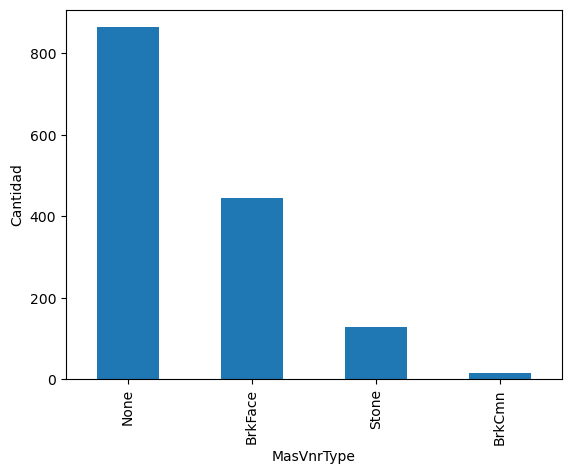

In [337]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

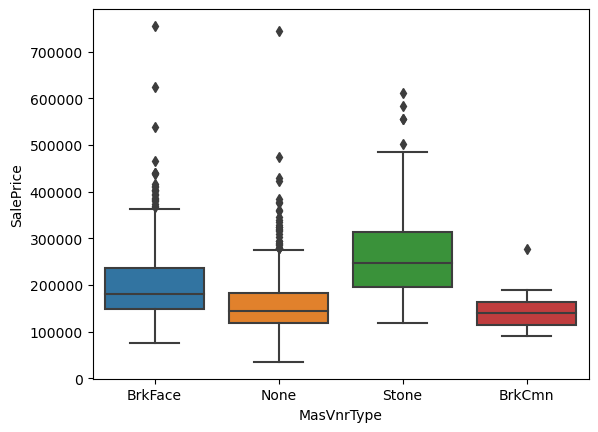

In [338]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

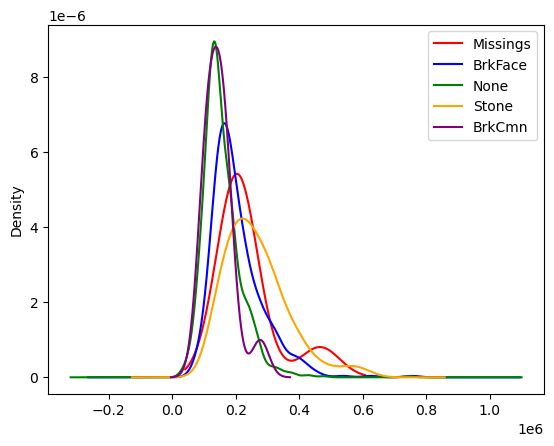

In [339]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'BrkFace']['SalePrice'].plot(kind="kde", color="blue", label="BrkFace")
dataHP[dataHP[cat_varName] == 'None']['SalePrice'].plot(kind="kde", color="green", label="None")
dataHP[dataHP[cat_varName] == 'Stone']['SalePrice'].plot(kind="kde", color="orange", label="Stone")
dataHP[dataHP[cat_varName] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="purple", label="BrkCmn")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable Stone por lo que se hara una imputacion agregando los faltantes a Stone

In [340]:
dataHP_Final[cat_varName].fillna('Stone', inplace=True)

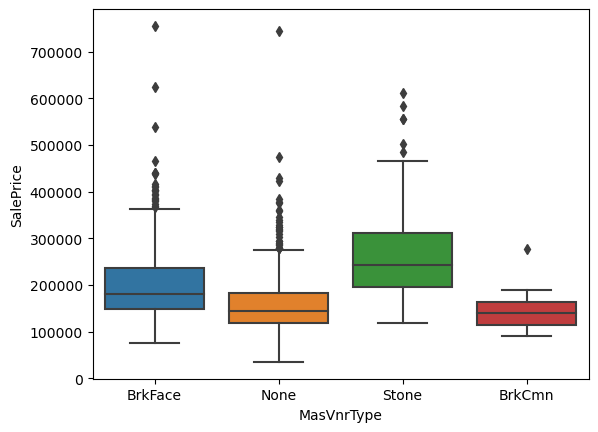

In [341]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

el boxplot muestra que no cambio mucho

#### BsmtQual

In [342]:
cat_varName = 'BsmtQual'

In [343]:
dataHP[cat_varName].isnull().mean()

0.025342465753424658

In [344]:
dataHP[cat_varName].value_counts()/len(dataHP)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

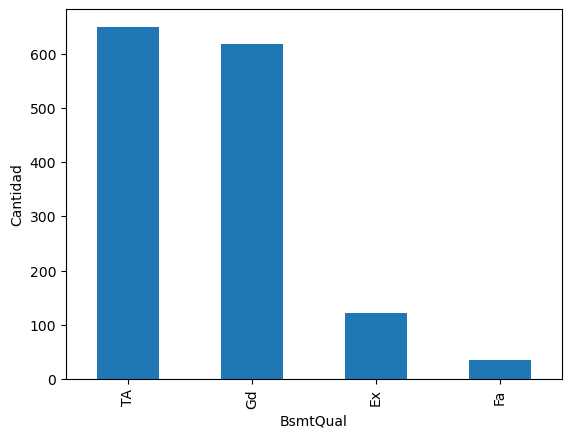

In [345]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

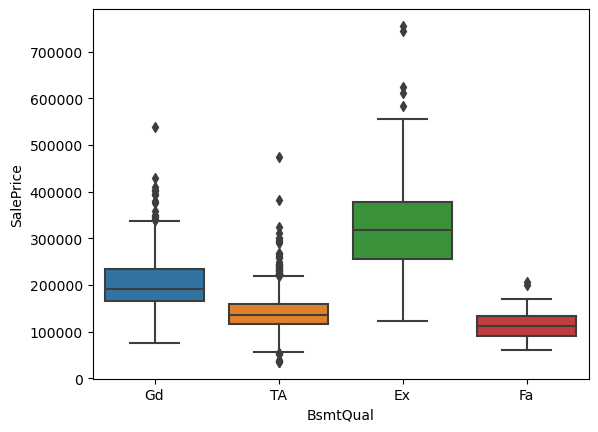

In [346]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

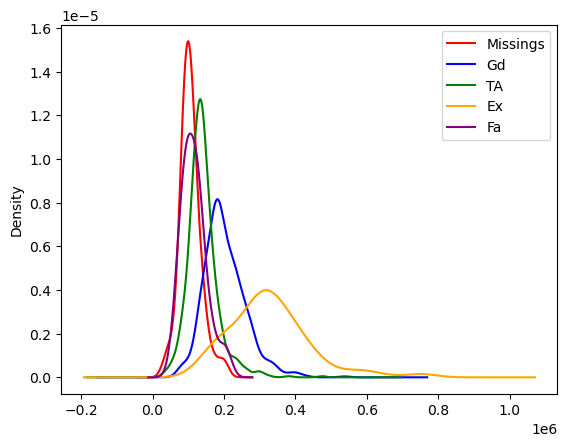

In [347]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP[dataHP[cat_varName] == 'TA']['SalePrice'].plot(kind="kde", color="green", label="TA")
dataHP[dataHP[cat_varName] == 'Ex']['SalePrice'].plot(kind="kde", color="orange", label="Ex")
dataHP[dataHP[cat_varName] == 'Fa']['SalePrice'].plot(kind="kde", color="purple", label="Fa")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable Fa por lo que se hara una imputacion agregando los faltantes a Fa

In [348]:
dataHP_Final[cat_varName].fillna('Fa', inplace=True)

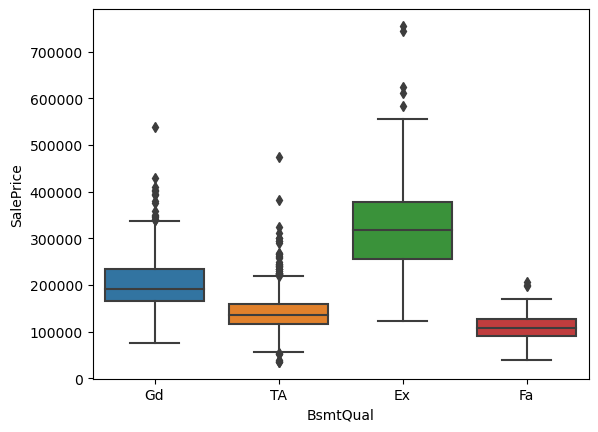

In [349]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

#### BsmtCond

In [350]:
cat_varName = 'BsmtCond'

In [351]:
dataHP[cat_varName].isnull().mean()

0.025342465753424658

In [352]:
dataHP[cat_varName].value_counts()/len(dataHP)

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

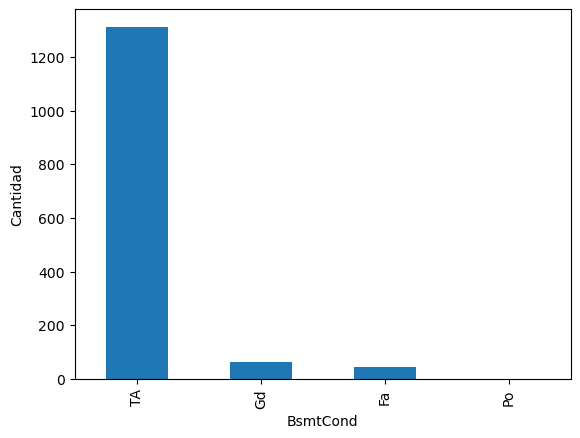

In [353]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

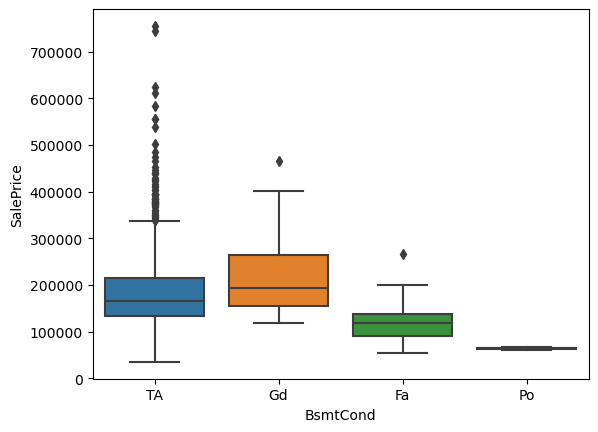

In [354]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

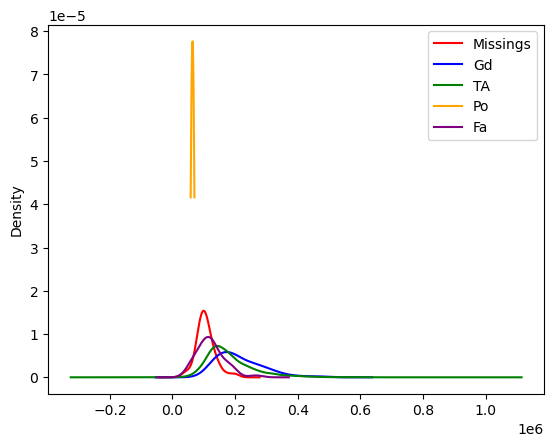

In [355]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP[dataHP[cat_varName] == 'TA']['SalePrice'].plot(kind="kde", color="green", label="TA")
dataHP[dataHP[cat_varName] == 'Po']['SalePrice'].plot(kind="kde", color="orange", label="Po")
dataHP[dataHP[cat_varName] == 'Fa']['SalePrice'].plot(kind="kde", color="purple", label="Fa")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable Fa por lo que se hara una imputacion agregando los faltantes a Fa

In [356]:
dataHP_Final[cat_varName].fillna('Fa', inplace=True)

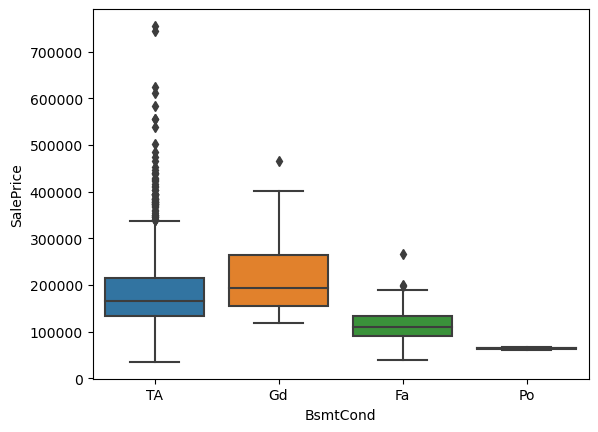

In [357]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

#### BsmtExposure

In [358]:
cat_varName = 'BsmtExposure'

In [359]:
dataHP[cat_varName].isnull().mean()

0.026027397260273973

In [360]:
dataHP[cat_varName].value_counts()/len(dataHP)

No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

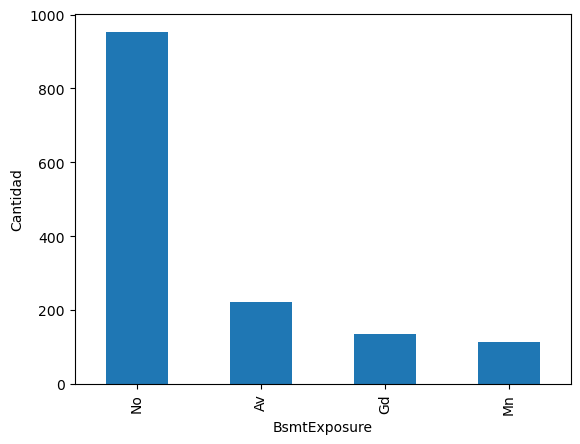

In [361]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

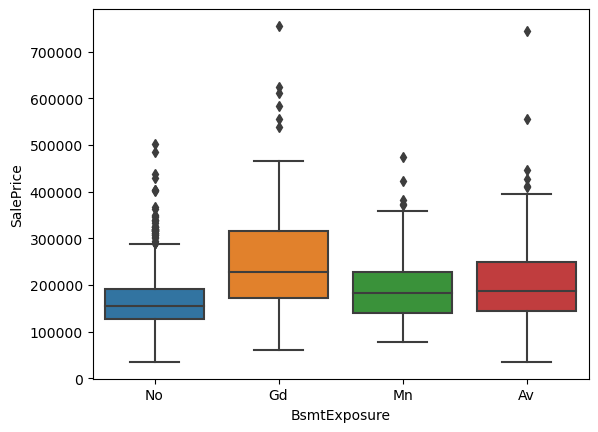

In [362]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

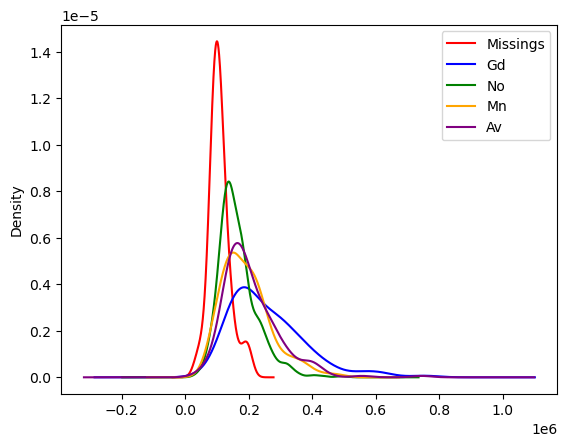

In [363]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP[dataHP[cat_varName] == 'No']['SalePrice'].plot(kind="kde", color="green", label="No")
dataHP[dataHP[cat_varName] == 'Mn']['SalePrice'].plot(kind="kde", color="orange", label="Mn")
dataHP[dataHP[cat_varName] == 'Av']['SalePrice'].plot(kind="kde", color="purple", label="Av")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable No por lo que se hara una imputacion agregando los faltantes a No

In [364]:
dataHP_Final[cat_varName].fillna('No', inplace=True)

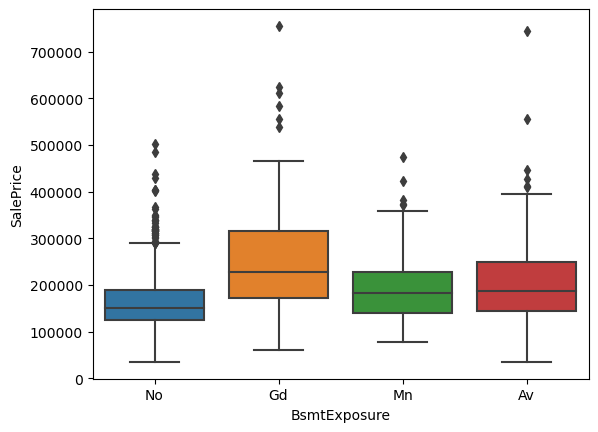

In [365]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

#### BsmtFinType1

In [366]:
cat_varName = 'BsmtFinType1'

In [367]:
dataHP[cat_varName].isnull().mean()

0.025342465753424658

In [368]:
dataHP[cat_varName].value_counts()/len(dataHP)

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

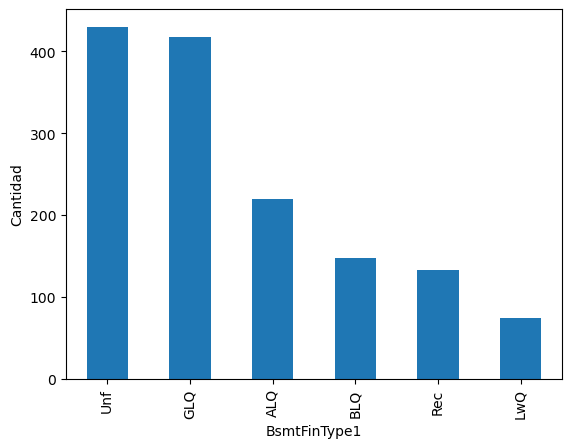

In [369]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

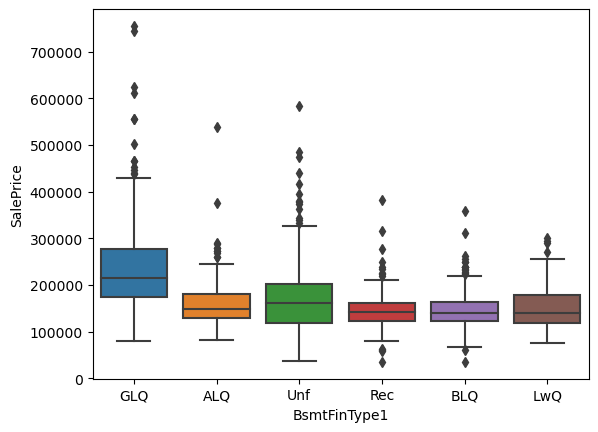

In [370]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

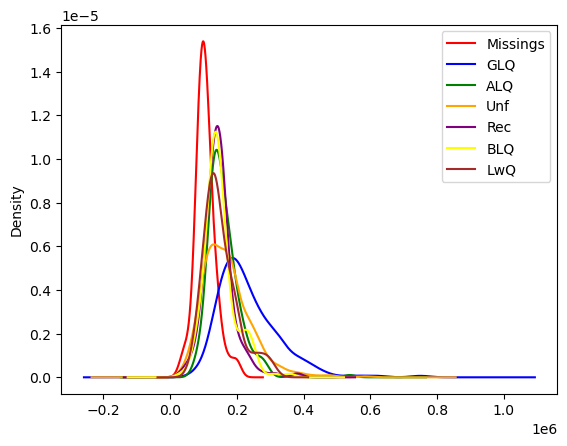

In [371]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataHP[dataHP[cat_varName] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataHP[dataHP[cat_varName] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataHP[dataHP[cat_varName] == 'Rec']['SalePrice'].plot(kind="kde", color="purple", label="Rec")
dataHP[dataHP[cat_varName] == 'BLQ']['SalePrice'].plot(kind="kde", color="yellow", label="BLQ")
dataHP[dataHP[cat_varName] == 'LwQ']['SalePrice'].plot(kind="kde", color="brown", label="LwQ")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable Lwq por lo que se hara una imputacion agregando los faltantes a LwQ

In [372]:
dataHP_Final[cat_varName].fillna('LwQ', inplace=True)

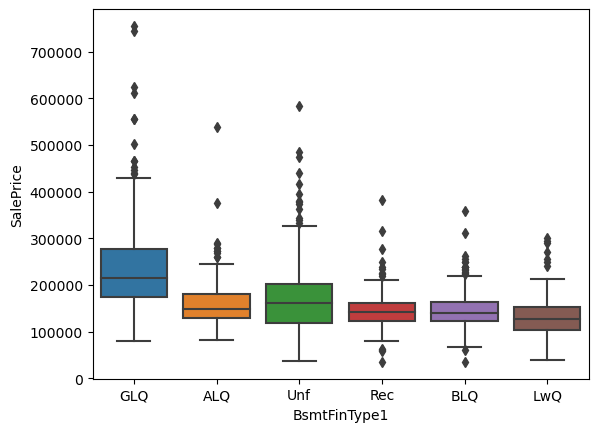

In [373]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

#### BsmtFinType2

In [374]:
cat_varName = 'BsmtFinType2'

In [375]:
dataHP[cat_varName].isnull().mean()

0.026027397260273973

In [376]:
dataHP[cat_varName].value_counts()/len(dataHP)

Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

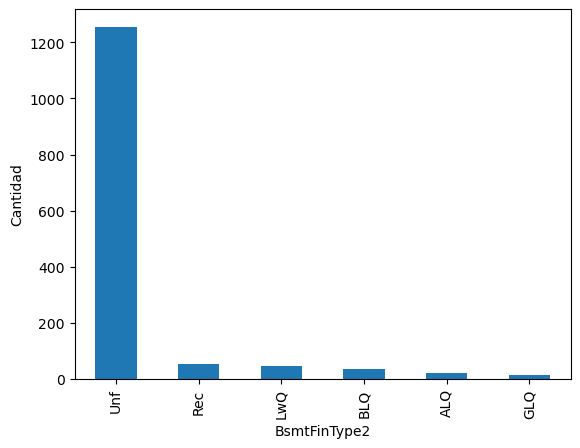

In [377]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

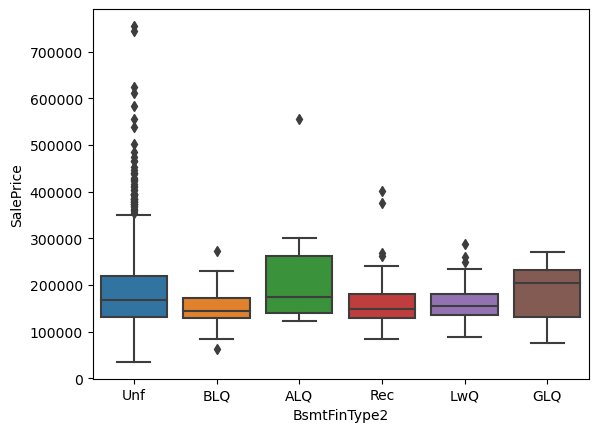

In [378]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

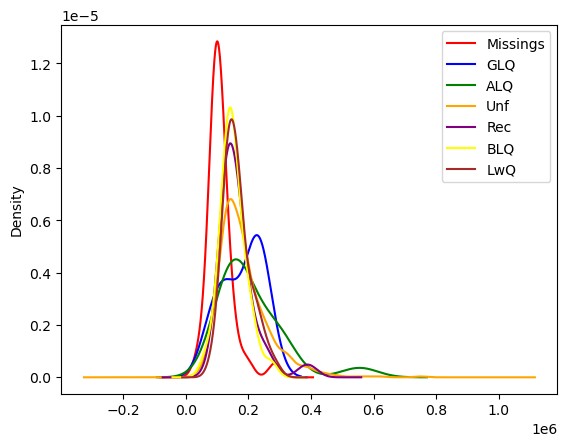

In [379]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP[cat_varName].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP[cat_varName] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataHP[dataHP[cat_varName] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataHP[dataHP[cat_varName] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataHP[dataHP[cat_varName] == 'Rec']['SalePrice'].plot(kind="kde", color="purple", label="Rec")
dataHP[dataHP[cat_varName] == 'BLQ']['SalePrice'].plot(kind="kde", color="yellow", label="BLQ")
dataHP[dataHP[cat_varName] == 'LwQ']['SalePrice'].plot(kind="kde", color="brown", label="LwQ")
ax.legend()
plt.show()

los valores null tienen un valor muy parecido a las que tienen la variable Lwq por lo que se hara una imputacion agregando los faltantes a LwQ, ademas mantenemos el mismo criterio que para la variable anterior

In [380]:
dataHP_Final[cat_varName].fillna('LwQ', inplace=True)

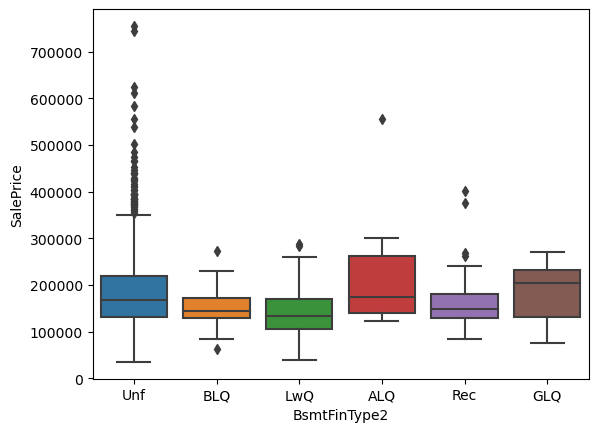

In [381]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

#### Electrical

In [382]:
cat_varName = 'Electrical'

In [383]:
dataHP[cat_varName].isnull().value_counts()

False    1459
True        1
Name: Electrical, dtype: int64

In [384]:
dataHP[cat_varName].value_counts()/len(dataHP)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

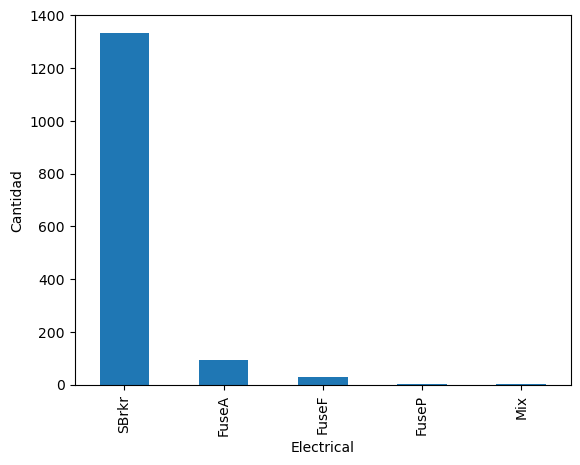

In [385]:
dataHP[cat_varName].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel(cat_varName)
plt.show()

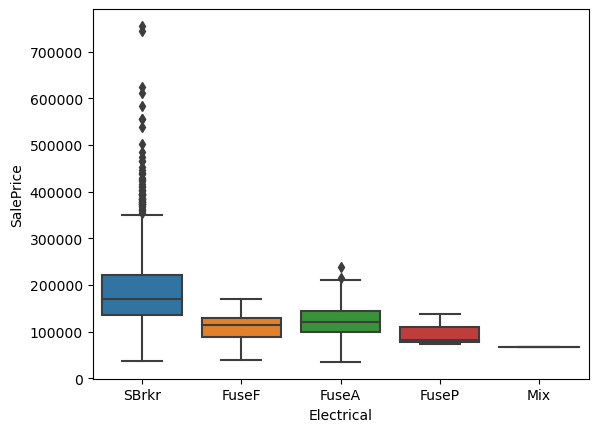

In [386]:
sns.boxplot(x=dataHP[cat_varName], y = dataHP['SalePrice'])
plt.show()

Como solamente es un valor el que es Null dentro de esta variable categorica, no se puede hacer una plot de distribucion

In [387]:
dataHP[dataHP[cat_varName].isnull()==True]['SalePrice']

1379    167500
Name: SalePrice, dtype: int64

In [388]:
dataHP[dataHP[cat_varName] == 'SBrkr']['SalePrice'].mean()

186825.1131934033

In [389]:
dataHP[dataHP[cat_varName] == 'FuseF']['SalePrice'].mean()

107675.44444444444

In [390]:
dataHP[dataHP[cat_varName] == 'FuseA']['SalePrice'].mean()

122196.89361702128

In [391]:

dataHP[dataHP[cat_varName] == 'FuseP']['SalePrice'].mean()

97333.33333333333

In [392]:
dataHP[dataHP[cat_varName] == 'Mix']['SalePrice'].mean()

67000.0

entre todos los valores el que mas se asemeja el precio de venta es a la media del valor SBrkr, por lo que se hara la imputacion a este valor

In [393]:
dataHP_Final[cat_varName].fillna('SBrkr', inplace=True)

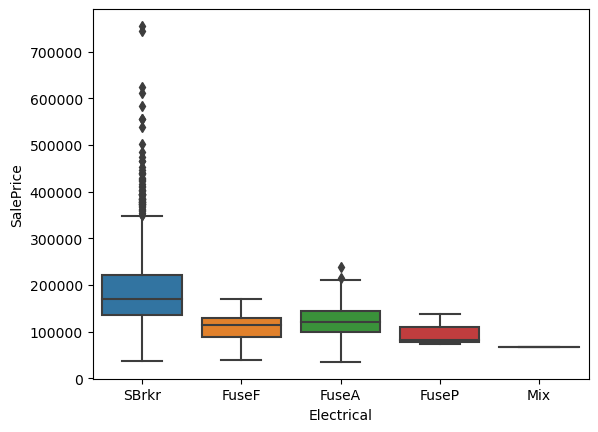

In [394]:
sns.boxplot(x=dataHP_Final[cat_varName], y = dataHP['SalePrice'])
plt.show()

## Codificacion de variables Categoricas

obteniendo los tipos de datos en las columnas del dataset

In [395]:
def getColumnTypes(dataset):
  '''
  Descripcion: Esta funcion extrae el tipo de dominio de las columnas de un dataset
  Entrada: Pandas Dataframe
  Salida: Tupla con arreglo que contiene nombres de las columnas
  '''
  continuas = []
  discretas = []
  categoricas = []
  for col in dataset.columns:
    if((dataset[col].dtype=='int') or (dataset[col].dtype=='float') or (dataset[col].dtype=='int64') or (dataset[col].dtype=='float64')):
      if((len(dataset[col].unique())>30)):
        continuas.append(col)
      else:
        discretas.append(col)
    else:
      categoricas.append(col)

  return continuas, discretas, categoricas

In [396]:
continuas, discretas, categoricas = getColumnTypes(dataHP_Final)

In [397]:
len(categoricas)

34

Separa las formas en las que se van a categorizar cada variable categorica segun la cantidad de valores unicos en ellas

In [398]:
OHE_cat = []
Label_cat = []
Freq_cat = []
for col in categoricas:
    if len(dataHP_Final[col].unique()) == 2:
        OHE_cat.append(col)
    elif (len(dataHP_Final[col].unique()) == 3) or (len(dataHP_Final[col].unique()) == 4):
        Label_cat.append(col)
    else:
        Freq_cat.append(col)

In [399]:
OHE_cat

['Street', 'Utilities', 'CentralAir']

In [400]:
Label_cat

['LotShape',
 'LandContour',
 'LandSlope',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'KitchenQual',
 'PavedDrive']

In [401]:
Freq_cat

['MSZoning',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterCond',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'Functional',
 'SaleType',
 'SaleCondition']

#### One Hot Encoding k-1

In [402]:
dataHP_Final.shape

(1460, 70)

In [403]:
for col in OHE_cat:
    dataHP_Final[col] = pd.get_dummies(dataHP[col], drop_first=True)

In [404]:
dataHP_Final.shape

(1460, 70)

luego del OHE k-1 el dataset mantuvo su shape

#### Label Encoding

##### LotShape

In [405]:
cat_varName = 'LotShape'

In [406]:
dataHP_Final[cat_varName].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [407]:
cat_mapping = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}

In [408]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### LandContour

In [409]:
cat_varName = 'LandContour'

In [410]:
dataHP_Final[cat_varName].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [411]:
cat_mapping = {'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3}

In [412]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### LandSlope

In [413]:
cat_varName = 'LandSlope'

In [414]:
dataHP_Final[cat_varName].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [415]:
cat_mapping = {'Gtl': 0, 'Mod': 1, 'Sev': 2}

In [416]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### MasVnrType

In [417]:
cat_varName = 'MasVnrType'

In [418]:
dataHP_Final[cat_varName].value_counts()

None       864
BrkFace    445
Stone      136
BrkCmn      15
Name: MasVnrType, dtype: int64

In [419]:
cat_mapping = {'None': 0, 'BrkCmn': 1, 'BrkFace': 2, 'Stone': 3}

In [420]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### ExterQual

In [421]:
cat_varName = 'ExterQual'

In [422]:
dataHP_Final[cat_varName].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [423]:
cat_mapping = {'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3}

In [424]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### BsmtQual

In [425]:
cat_varName = 'BsmtQual'

In [426]:
dataHP_Final[cat_varName].value_counts()

TA    649
Gd    618
Ex    121
Fa     72
Name: BsmtQual, dtype: int64

In [427]:
cat_mapping = {'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3}

In [428]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### BsmtCond

In [429]:
cat_varName = 'BsmtCond'

In [430]:
dataHP_Final[cat_varName].value_counts()

TA    1311
Fa      82
Gd      65
Po       2
Name: BsmtCond, dtype: int64

In [431]:
cat_mapping = {'TA': 0, 'Po': 1, 'Gd': 2, 'Fa': 3}

In [432]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### BsmtExposure

In [433]:
cat_varName = 'BsmtExposure'

In [434]:
dataHP_Final[cat_varName].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [435]:
cat_mapping = {'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3}

In [436]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### KitchenQual

In [437]:
cat_varName = 'KitchenQual'

In [438]:
dataHP_Final[cat_varName].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [439]:
cat_mapping = {'TA': 0, 'Gd': 1, 'Fa': 2, 'Ex': 3}

In [440]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### PavedDrive

In [441]:
cat_varName = 'PavedDrive'

In [442]:
dataHP_Final[cat_varName].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [443]:
cat_mapping = {'P': 0, 'N': 1, 'Y': 2}

In [444]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

#### Frequency Encoding

In [445]:
Freq_cat_NA = []            # lista donde se almacenaran las categorias que no puedan mapearse por Frequency Encoding
for col in Freq_cat:
    cat_mapping = (dataHP_Final[col].value_counts().sort_values(ascending=False)).to_dict() # Crea el diccionario para mapear
    values = list(cat_mapping.values()) #crea un set con los valores para verificar que no se repita ningun valor
    if len(values) == len(set(values)): #varifica que no hayan valores con la misma frecuencia
        dataHP_Final[col] = dataHP_Final[col].map(cat_mapping) # mapeo
    else:
        Freq_cat_NA.append(col) #si hay valores con las misma frecuencia los almacena aca


In [446]:
Freq_cat_NA

['Neighborhood',
 'Condition2',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'SaleType']

estas son las columnas que no aplican a frequency mapping debido a que dos valores tienen la misma frecuencia, se procedera a hacer Label Mapping para estas

#### Label Encoding 2

##### Neighborhood

In [447]:
cat_varName = 'Neighborhood'

In [448]:
dataHP_Final[cat_varName].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [449]:
cat_mapping = {'NAmes': 0, 
               'CollgCr': 1,
               'OldTown': 2,
               'Edwards': 3,
               'Somerst': 4,
               'Gilbert': 5,
               'NridgHt': 6,
               'Sawyer': 7,
               'NWAmes': 8,
               'SawyerW': 9,
               'BrkSide': 10,
               'Crawfor': 11,
               'Mitchel': 12,
               'NoRidge': 13,
               'Timber': 14,
               'IDOTRR': 15,
               'ClearCr': 16,
               'StoneBr': 17,
               'SWISU': 18,
               'MeadowV': 19,
               'Blmngtn': 20,
               'BrDale': 21,
               'Veenker': 22,
               'NPkVill': 23,
               'Blueste': 24}

In [450]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### Condition2

In [451]:
cat_varName = 'Condition2'

In [452]:
dataHP_Final[cat_varName].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [453]:
cat_mapping = {'Norm': 0, 'Feedr': 1, 'Artery': 2, 'RRNn': 3, 'PosN': 4, 'PosA': 5, 'RRAn': 6, 'RRAe': 7}

In [454]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### RoofMatl

In [455]:
cat_varName = 'RoofMatl'

In [456]:
dataHP_Final[cat_varName].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [457]:
cat_mapping = {'CompShg': 0, 'Tar&Grv': 1, 'WdShngl': 2, 'WdShake': 3, 'Metal': 4, 'Membran': 5, 'Roll': 6, 'ClyTile': 7}

In [458]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### Exterior1st

In [459]:
cat_varName = 'Exterior1st'

In [460]:
dataHP_Final[cat_varName].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [461]:
cat_mapping = {'VinylSd': 0, 
               'HdBoard': 1,
               'MetalSd': 2,
               'Wd Sdng': 3,
               'Plywood': 4,
               'CemntBd': 5,
               'BrkFace': 6,
               'WdShing': 7,
               'Stucco': 8,
               'AsbShng': 9,
               'BrkComm': 10,
               'Stone': 11,
               'AsphShn': 12,
               'ImStucc': 13,
               'CBlock': 14}

In [462]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### Exterior2nd

In [463]:
cat_varName = 'Exterior2nd'

In [464]:
dataHP_Final[cat_varName].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [465]:
cat_mapping = {'VinylSd': 0, 
               'HdBoard': 1,
               'MetalSd': 2,
               'Wd Sdng': 3,
               'Plywood': 4,
               'CemntBd': 5,
               'BrkFace': 6,
               'WdShing': 7,
               'Stucco': 8,
               'AsbShng': 9,
               'Brk Cmn': 10,
               'Stone': 11,
               'AsphShn': 12,
               'ImStucc': 13,
               'CBlock': 14,
               'Wd Shng': 15,
               'Other': 16}

In [466]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

##### SaleType

In [467]:
cat_varName = 'SaleType'

In [468]:
dataHP_Final[cat_varName].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [469]:
cat_mapping = {'WD': 0, 
               'New': 1,
               'COD': 2,
               'ConLD': 3,
               'ConLI': 4,
               'ConLw': 5,
               'CWD': 6,
               'Oth': 7,
               'Con': 8}

In [470]:
dataHP_Final[cat_varName] = dataHP_Final[cat_varName].map(cat_mapping)

### Final

In [471]:
for col in dataHP_Final.columns:
    if (dataHP_Final[col].dtype == 'int64') or (dataHP_Final[col].dtype == 'uint8') or (dataHP_Final[col].dtype == 'float64'):
        pass
    else:
        print(f'{col} tiene tipo {dataHP_Final[col].dtype}')

no imprime nada porque todos los datos son numericos

Todas las variables categoricas ya estan codificadas, ya se puede trabajar el dataset

In [472]:
dataHP_Final.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151,8450,1,0,3,0,1052,0,...,0,0,0,0,0,2,2008,0,1198,208500
1,2,20,1151,9600,1,0,3,0,47,0,...,0,0,0,0,0,5,2007,0,1198,181500
2,3,60,1151,11250,1,1,3,0,1052,0,...,0,0,0,0,0,9,2008,0,1198,223500
3,4,70,1151,9550,1,1,3,0,263,0,...,272,0,0,0,0,2,2006,0,101,140000
4,5,60,1151,14260,1,1,3,0,47,0,...,0,0,0,0,0,12,2008,0,1198,250000


In [318]:
dataHP_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   uint8  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   uint8  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Tratamiento de Outliers

In [155]:
def plotDistBoxQQ(dataset, col):
     '''
     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers 
     Input: dataset-> pandas dataframe, col->string con nombre de columna
     output: visualiuzación de plots.
     '''
     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.distplot(dataset[col], bins=30)
     plt.title("Histograma y Densisdad")

     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     plt.title("Boxplot")

     plt.subplot(1, 3, 3)
     stats.probplot(dataset[col], dist="norm", plot=plt)
     plt.title("Q-Q Plot")

c:\Users\JuanPablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\JuanPablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\JuanPablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

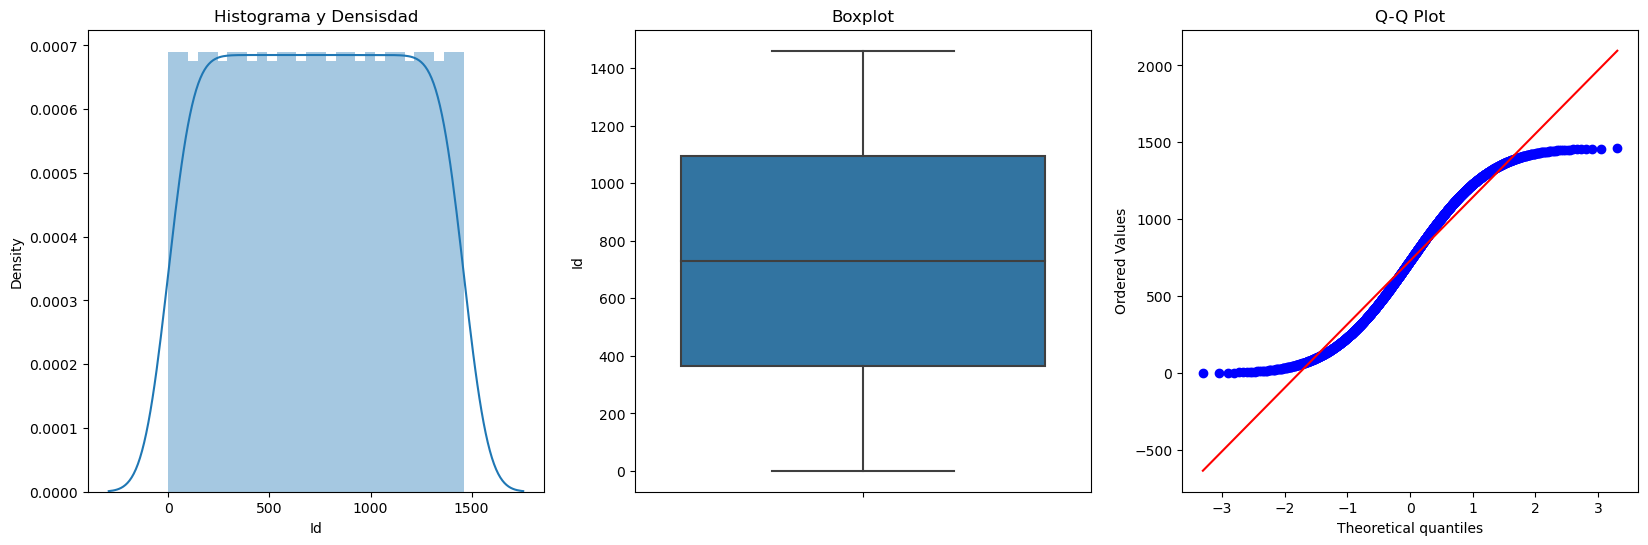

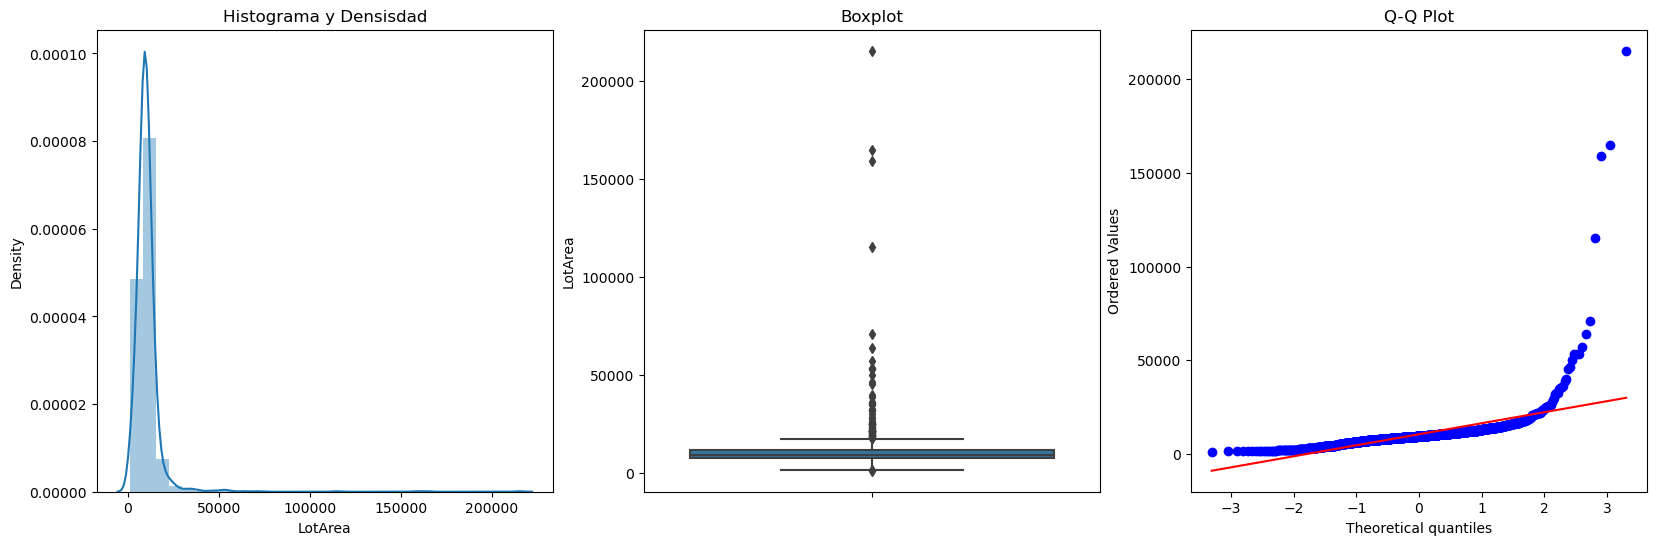

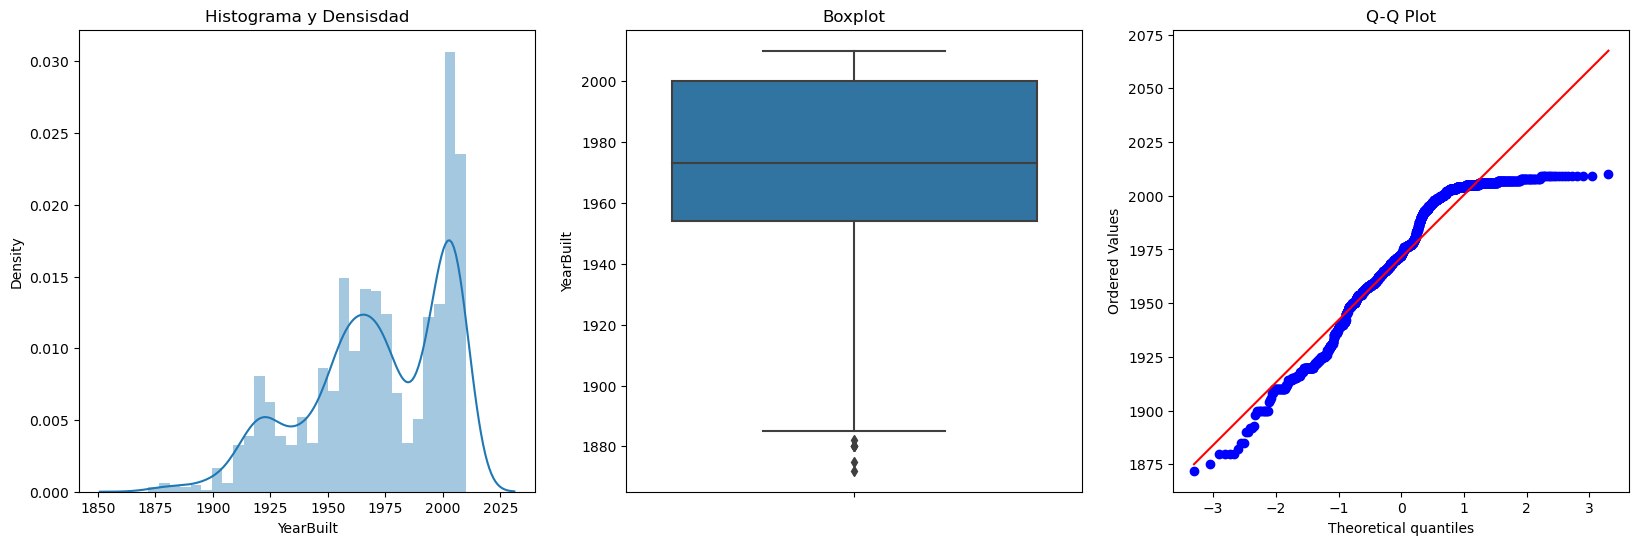

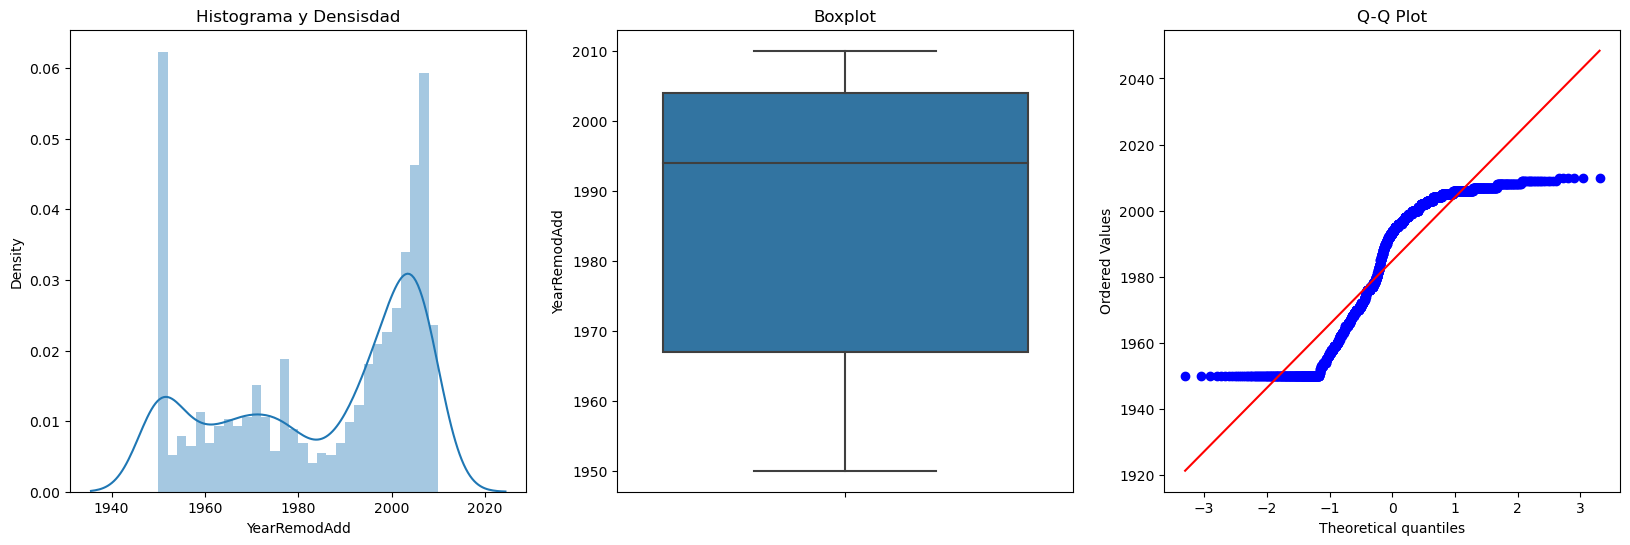

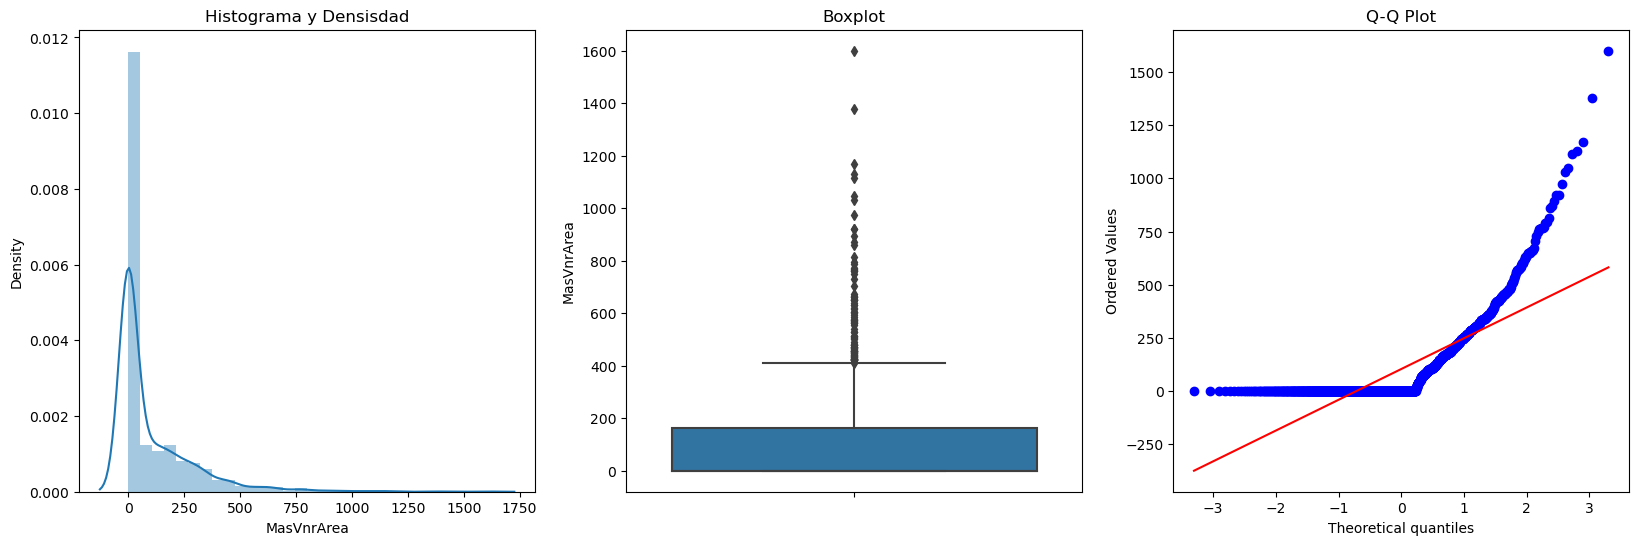

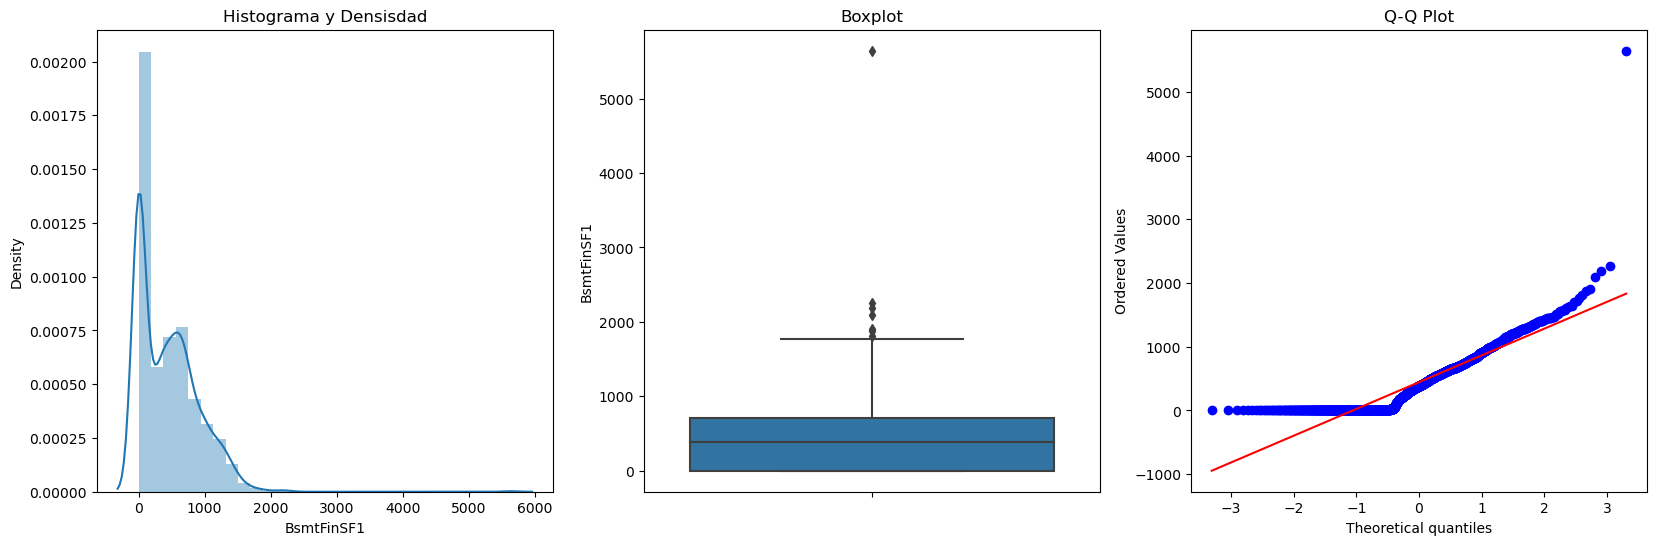

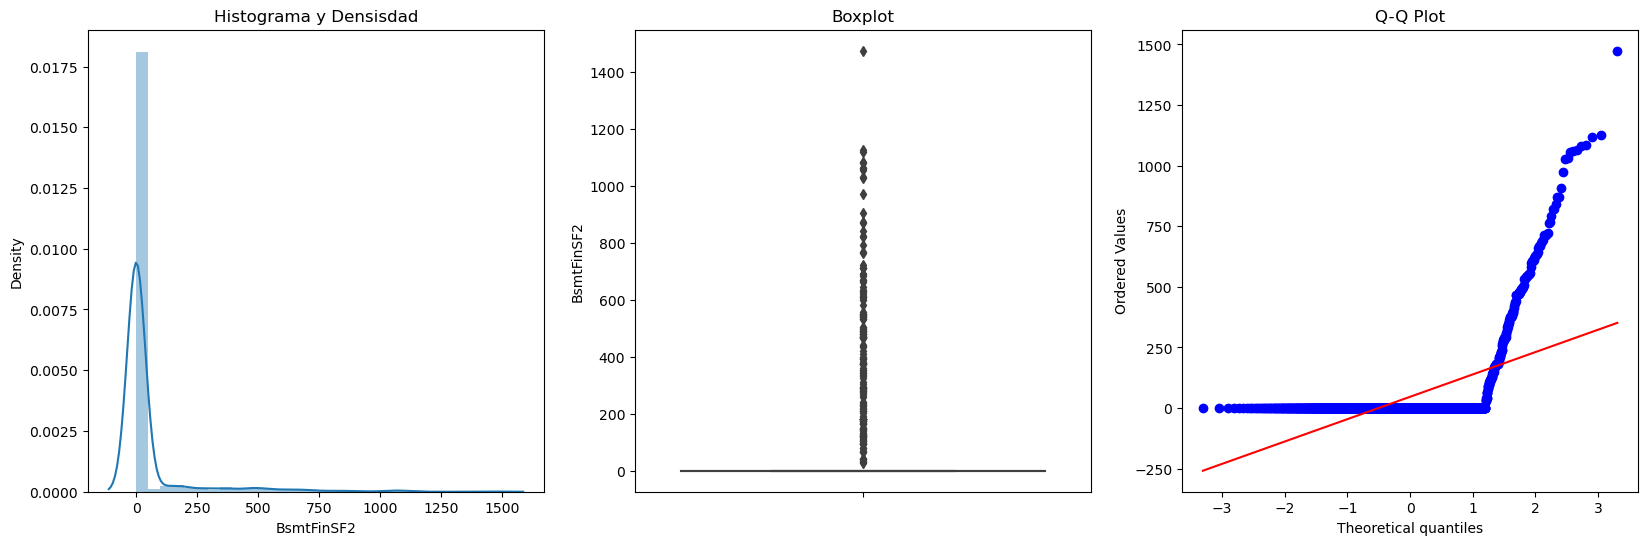

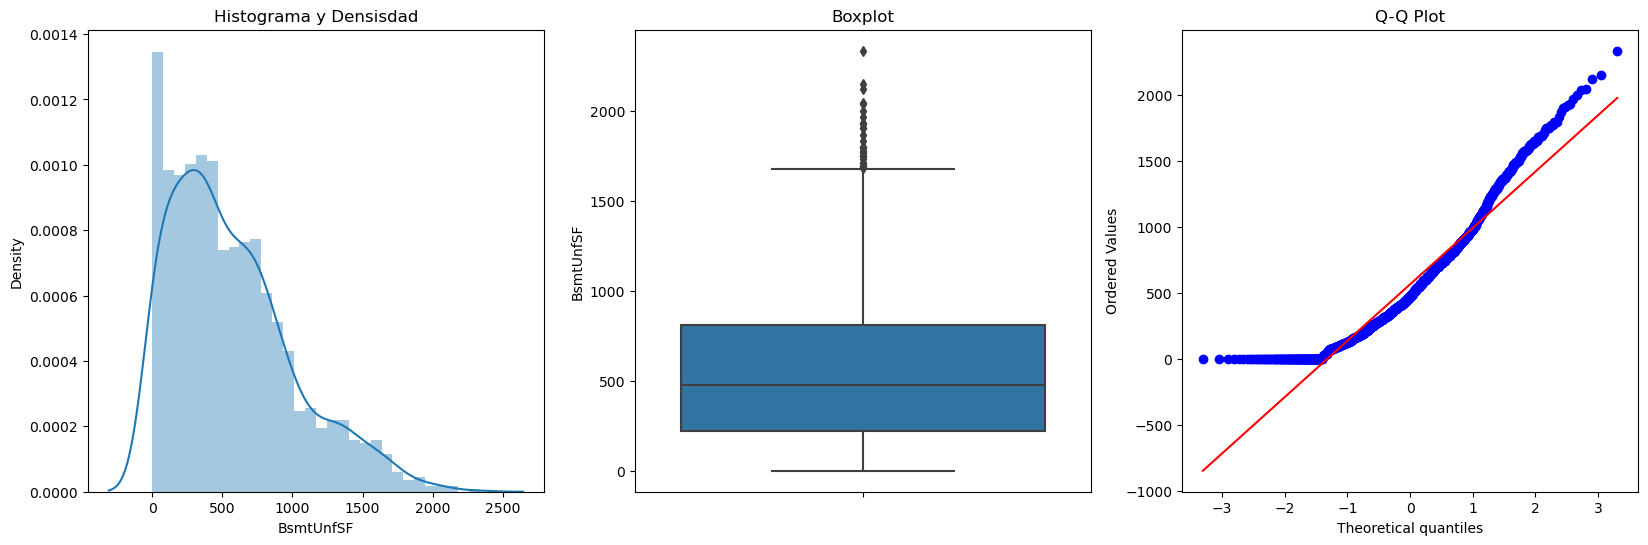

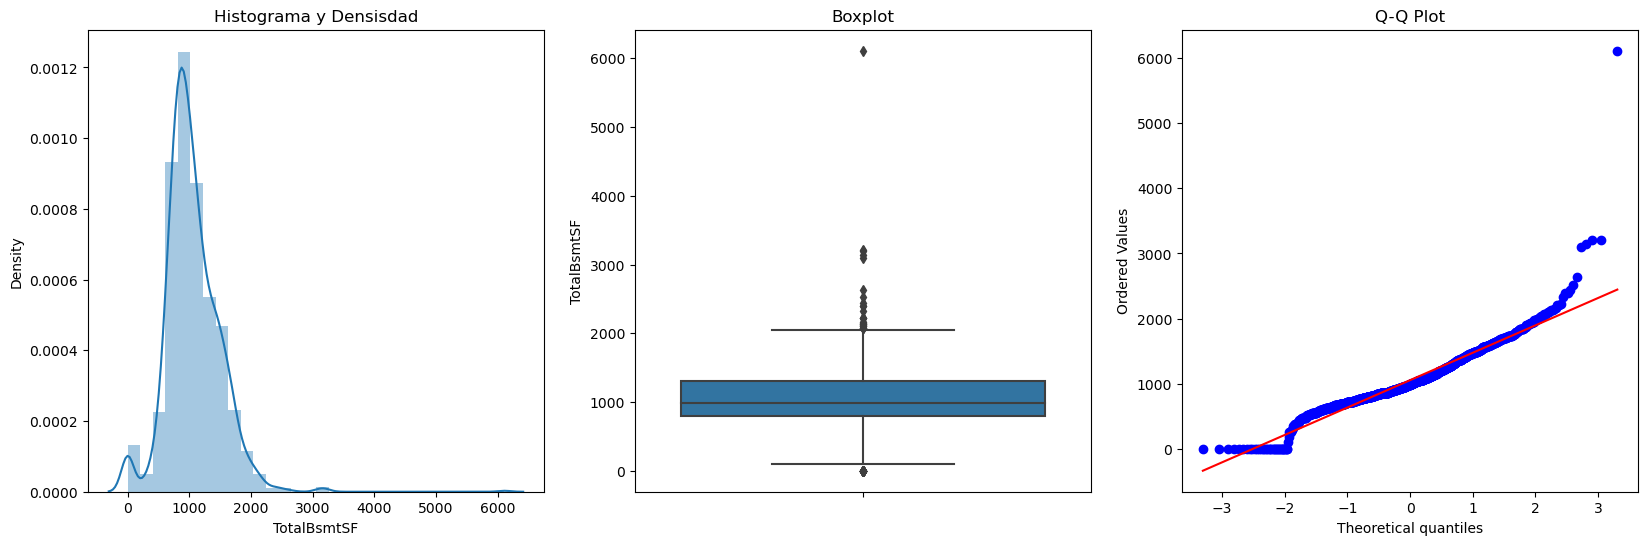

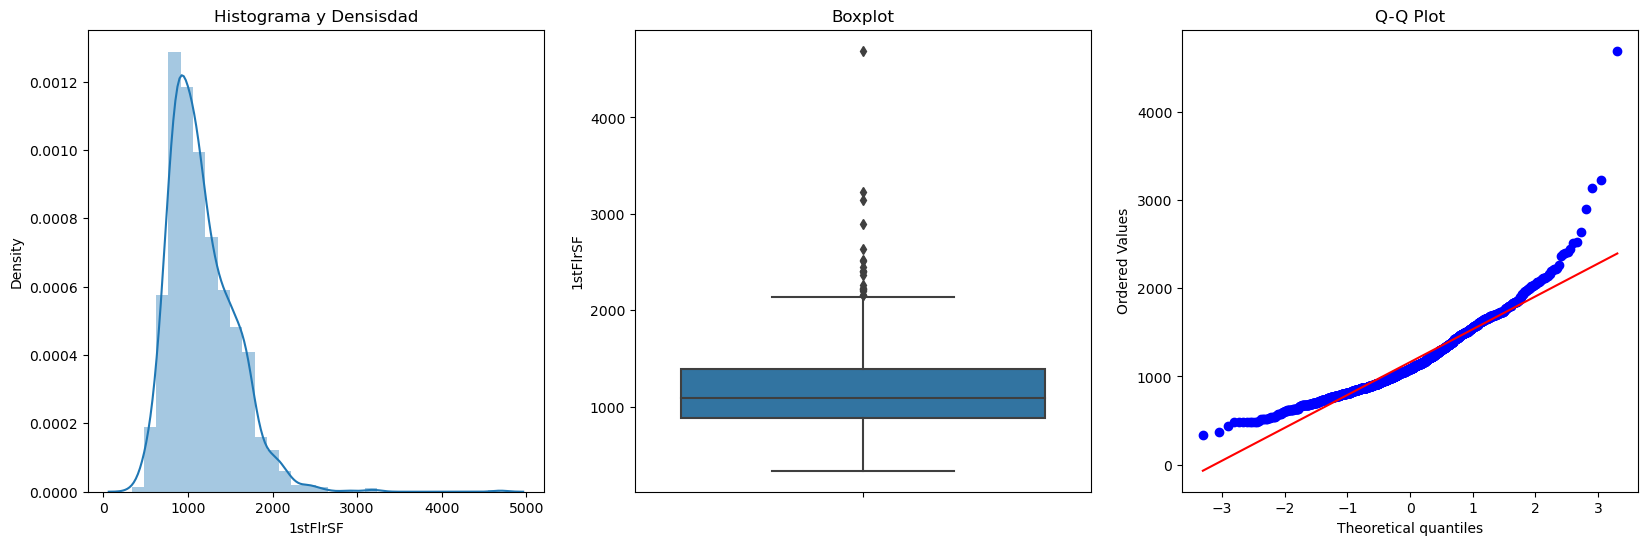

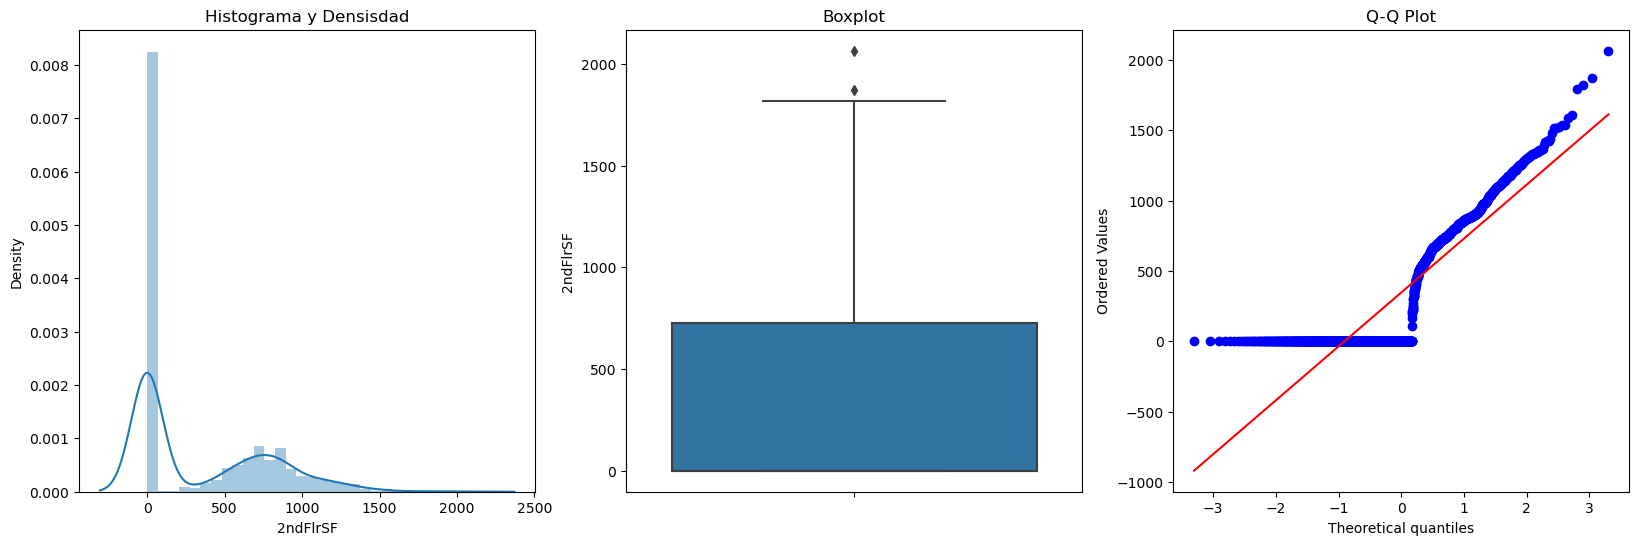

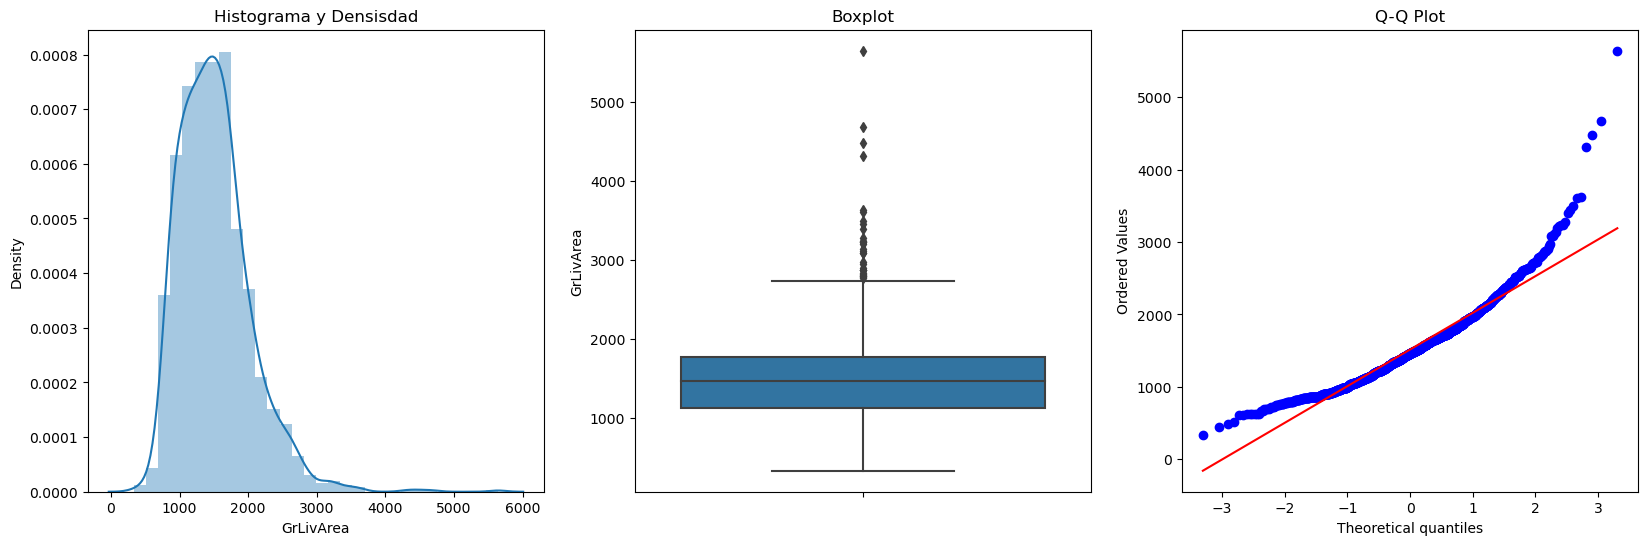

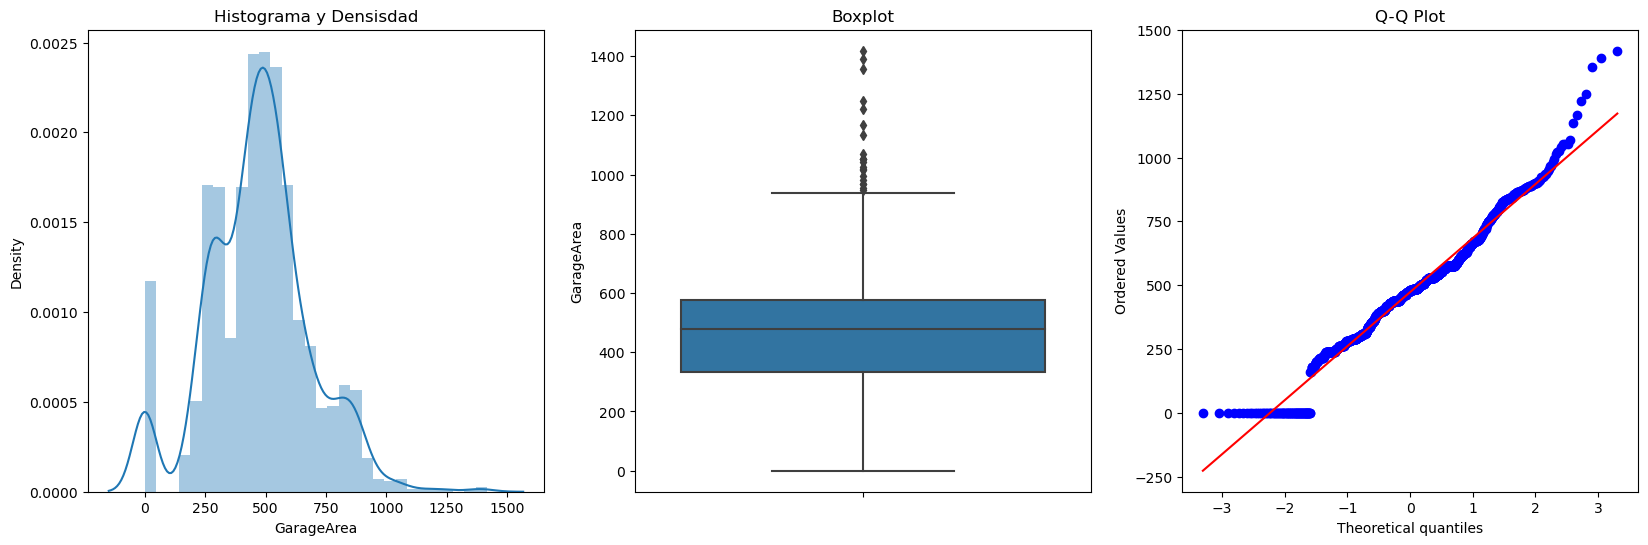

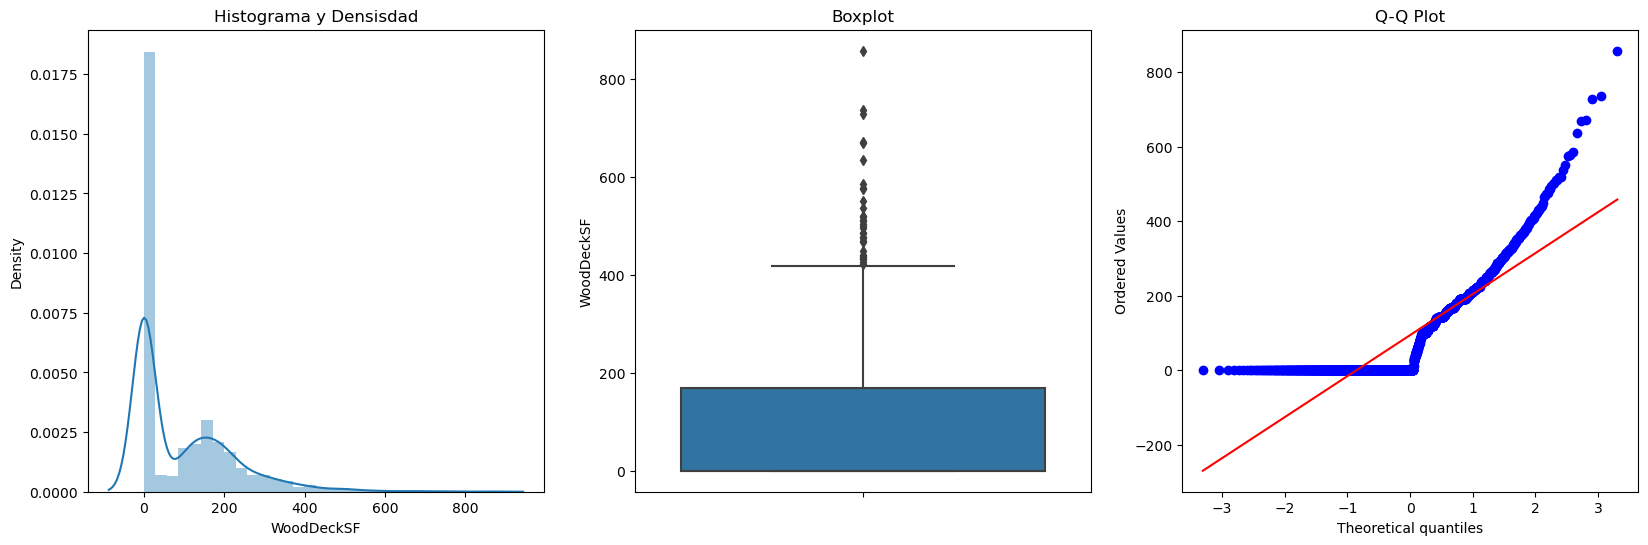

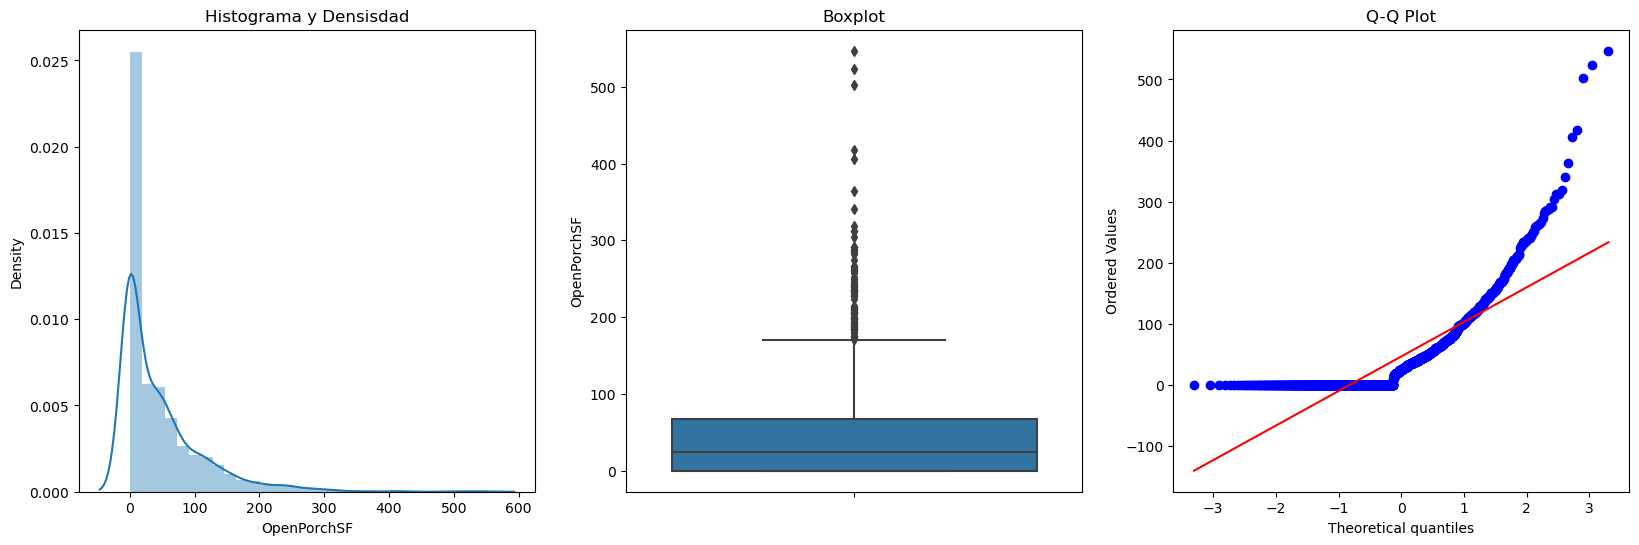

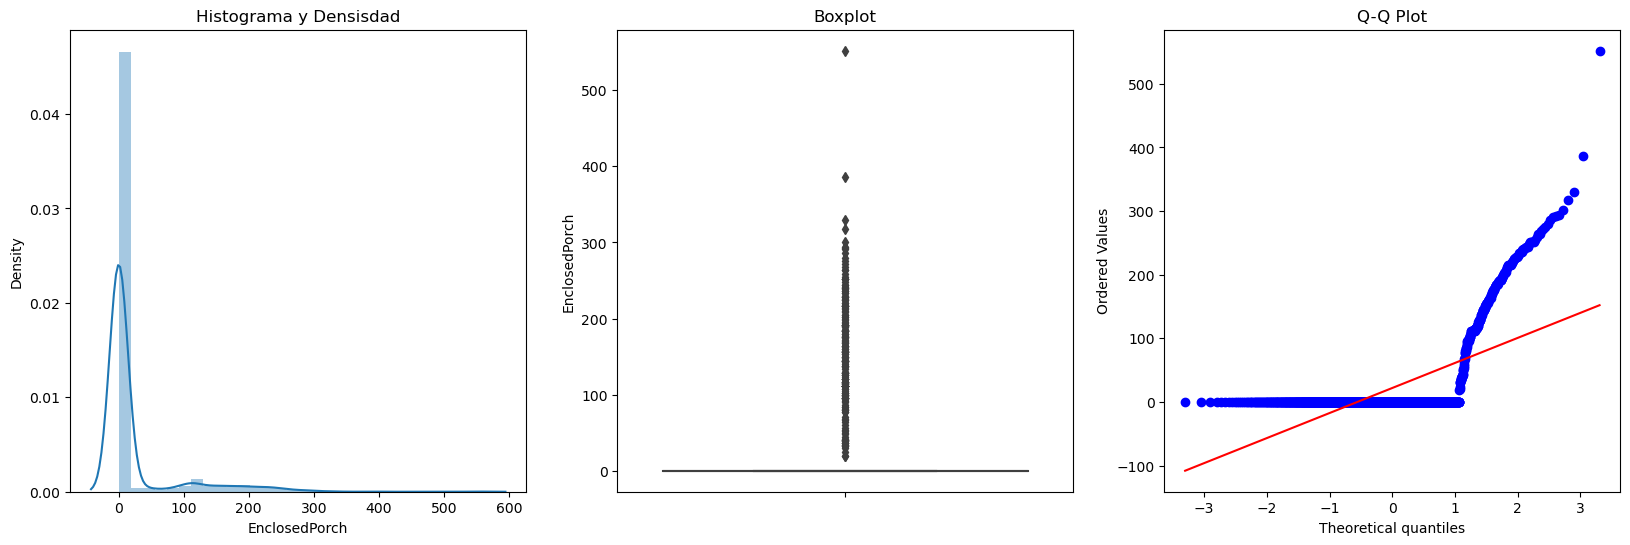

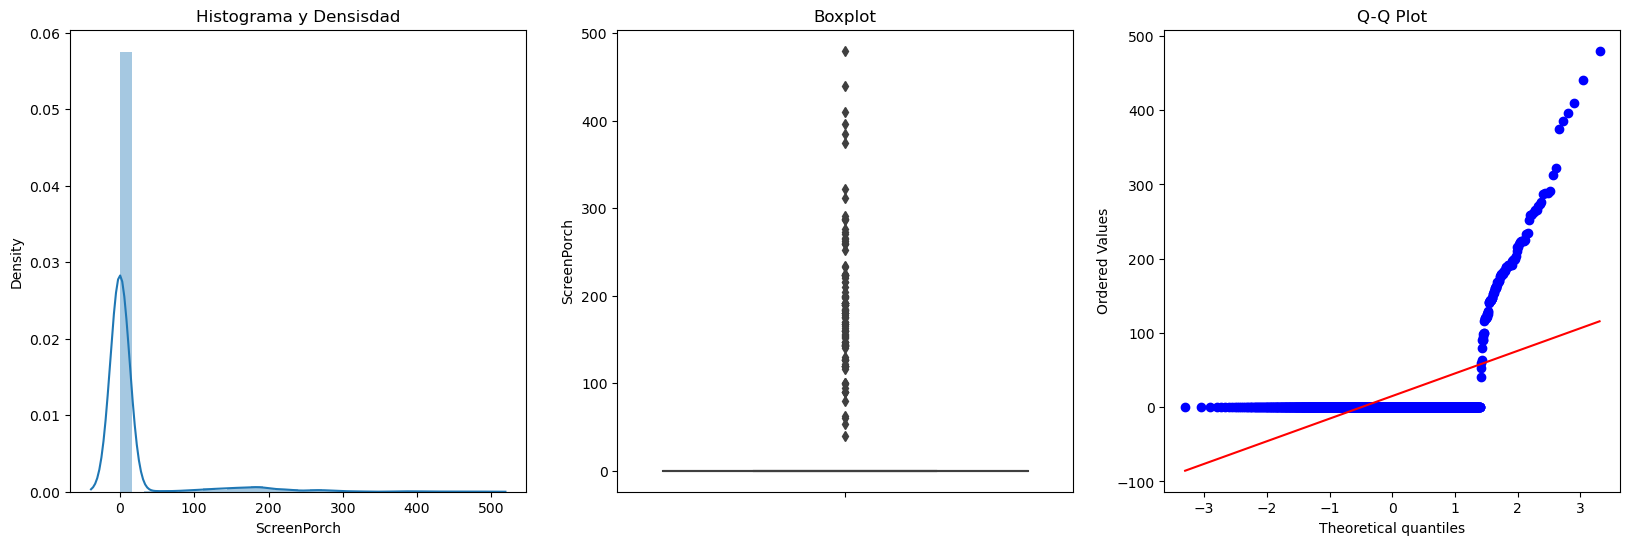

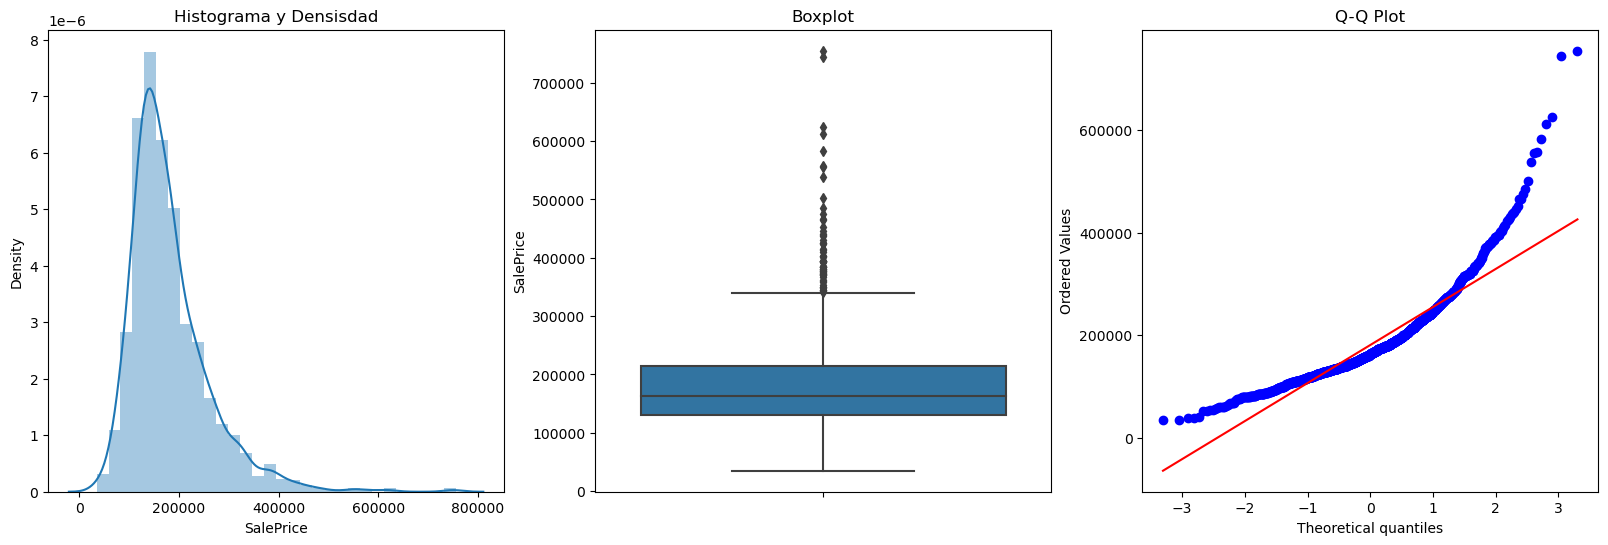

In [159]:
for col in continuas:
    plotDistBoxQQ(dataHP_Final, col)

In [475]:
def detectOutliersLimits(dataset, col):
    '''
    Descripción: Calcula los limites superiores e inferiores para detección de outliers.
    Input: dataset-> pandas dataframe, col -> string nombre de columna
    Output: tupla de floats con los limites superior e inferior
    '''
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    LI =  dataset[col].quantile(0.25) - (IQR*1.75)
    if LI<0: LI=0     # verifica si no da valor negativo, y si es asi lo trunca a 0
    LS = dataset[col].quantile(0.75) + (IQR*1.75)

    return LI, LS

In [476]:
for col in continuas:
    LI, LS = detectOutliersLimits(dataHP_Final,col)
    dataHP_Final[col]= np.where(dataHP_Final[col]>LS,LS,
                           np.where(dataHP_Final[col]<LI,LI,dataHP_Final[col]))

c:\Users\JuanPablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\JuanPablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\JuanPablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

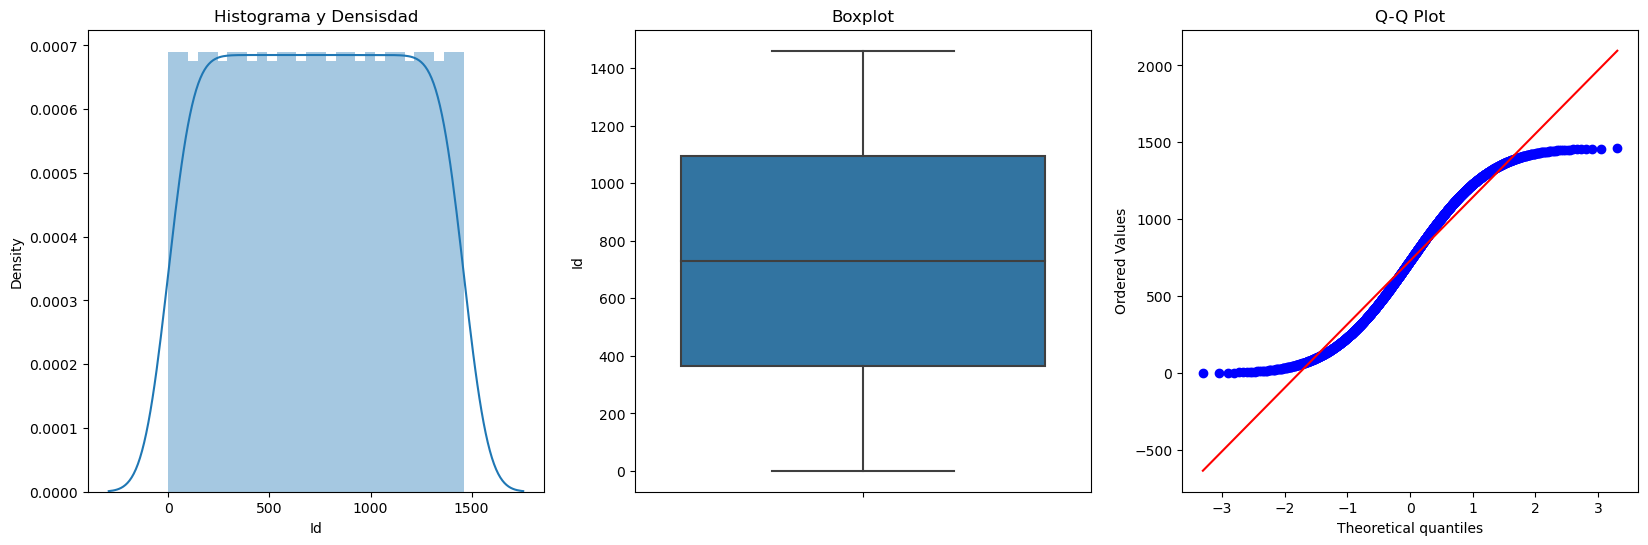

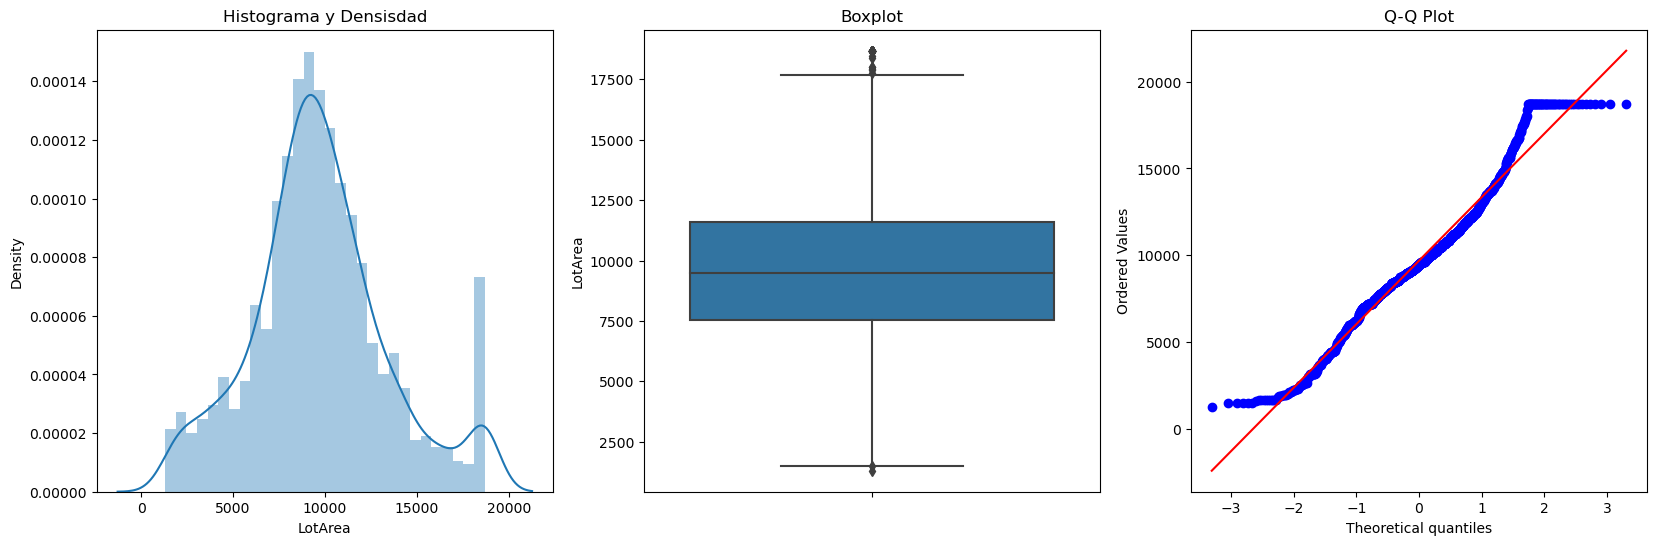

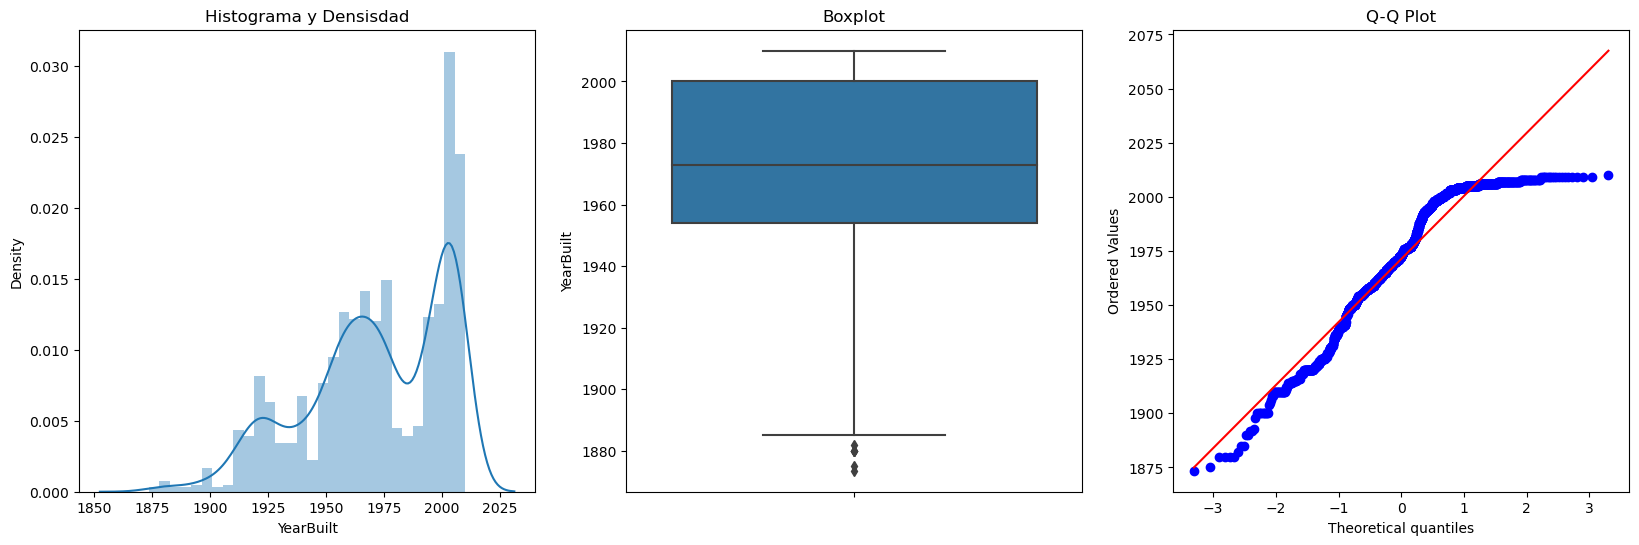

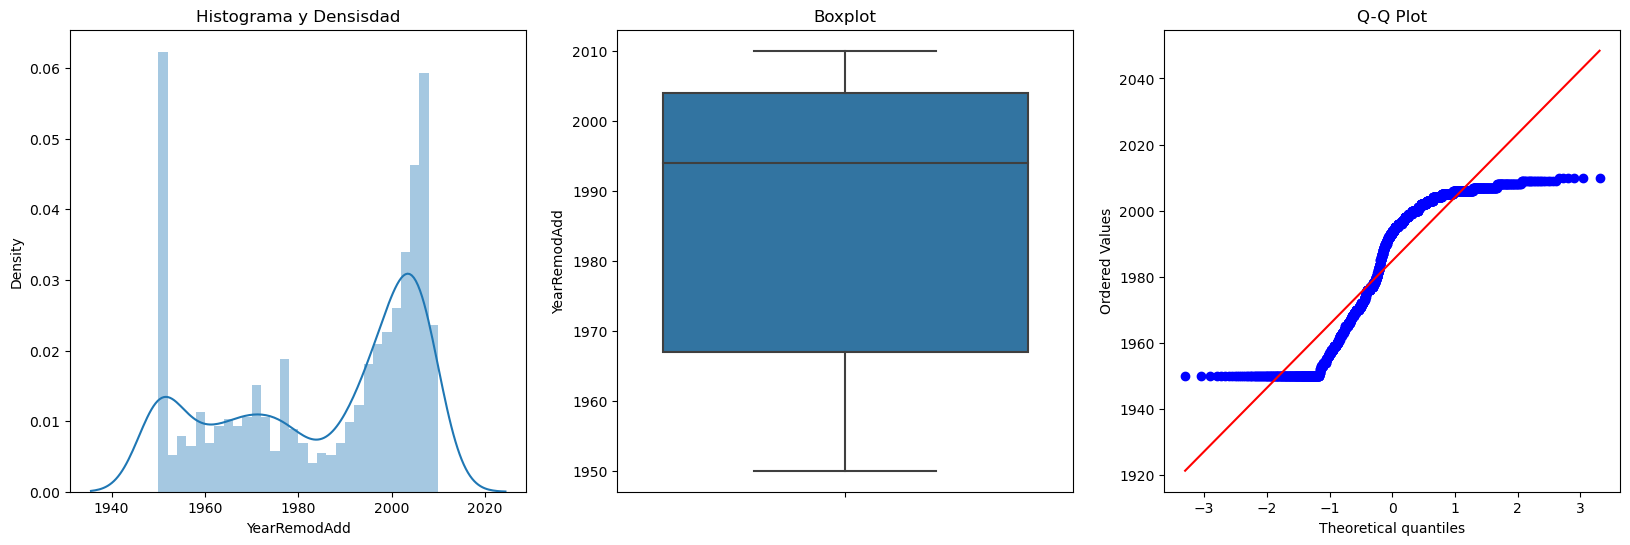

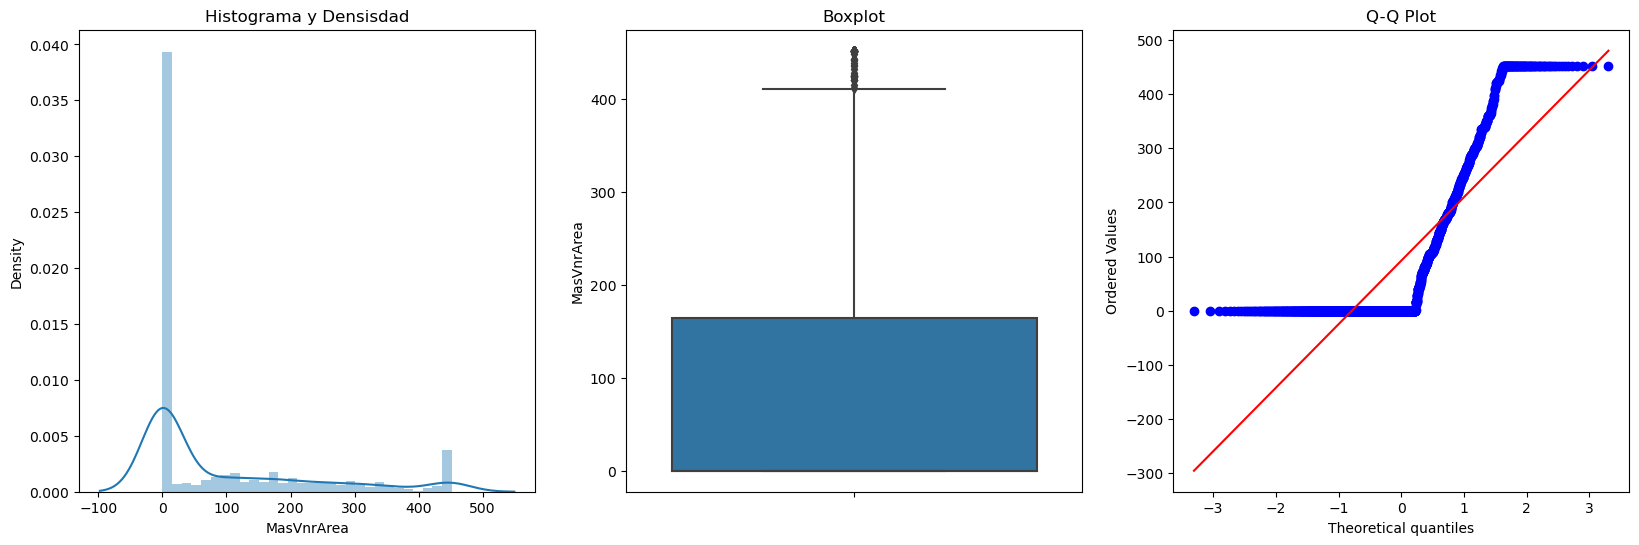

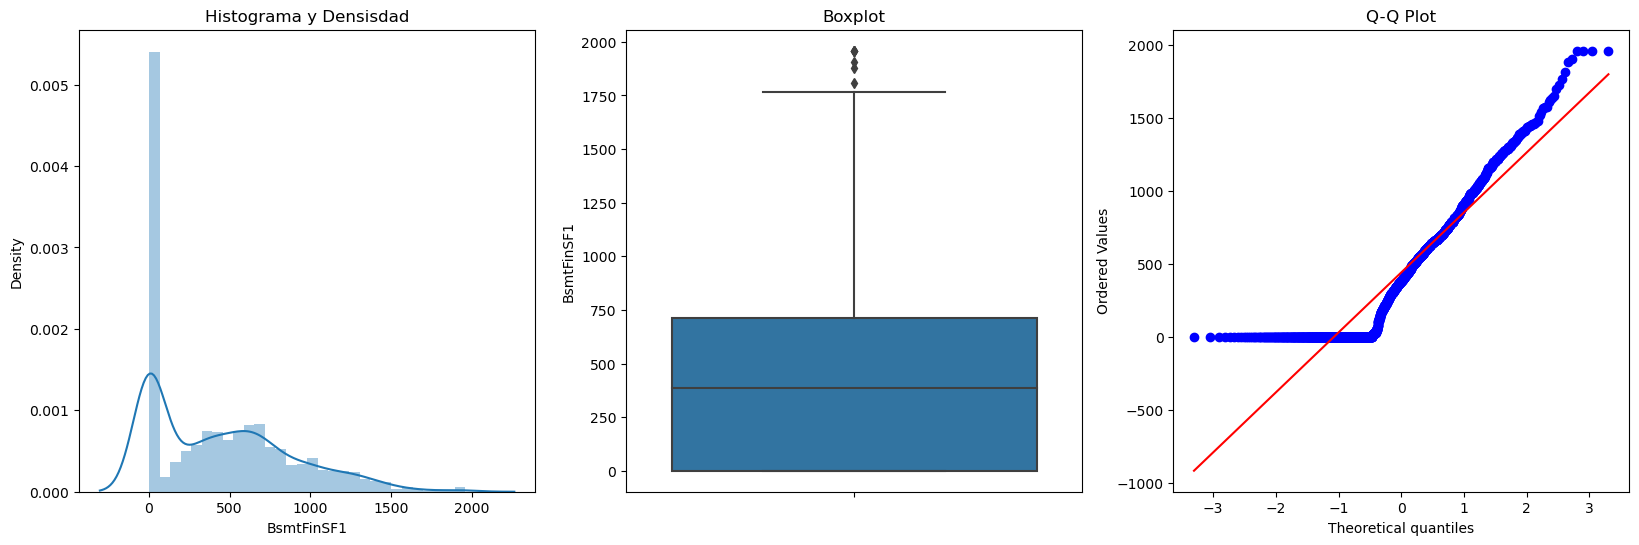

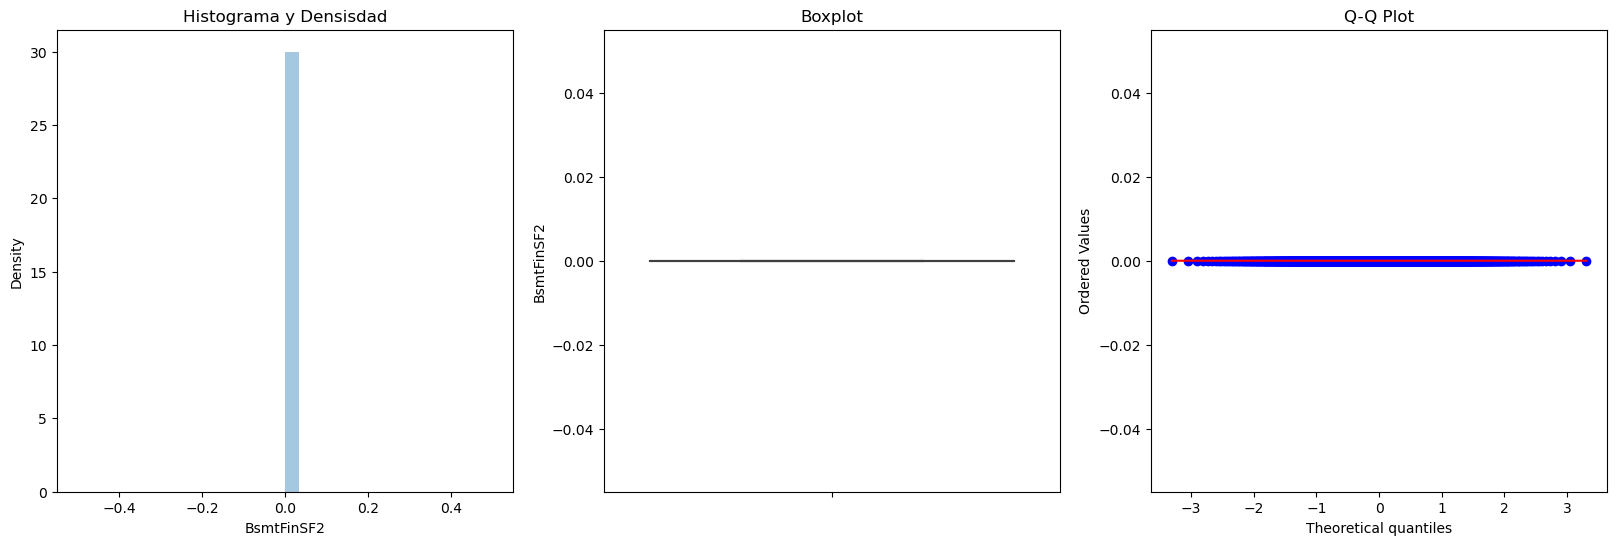

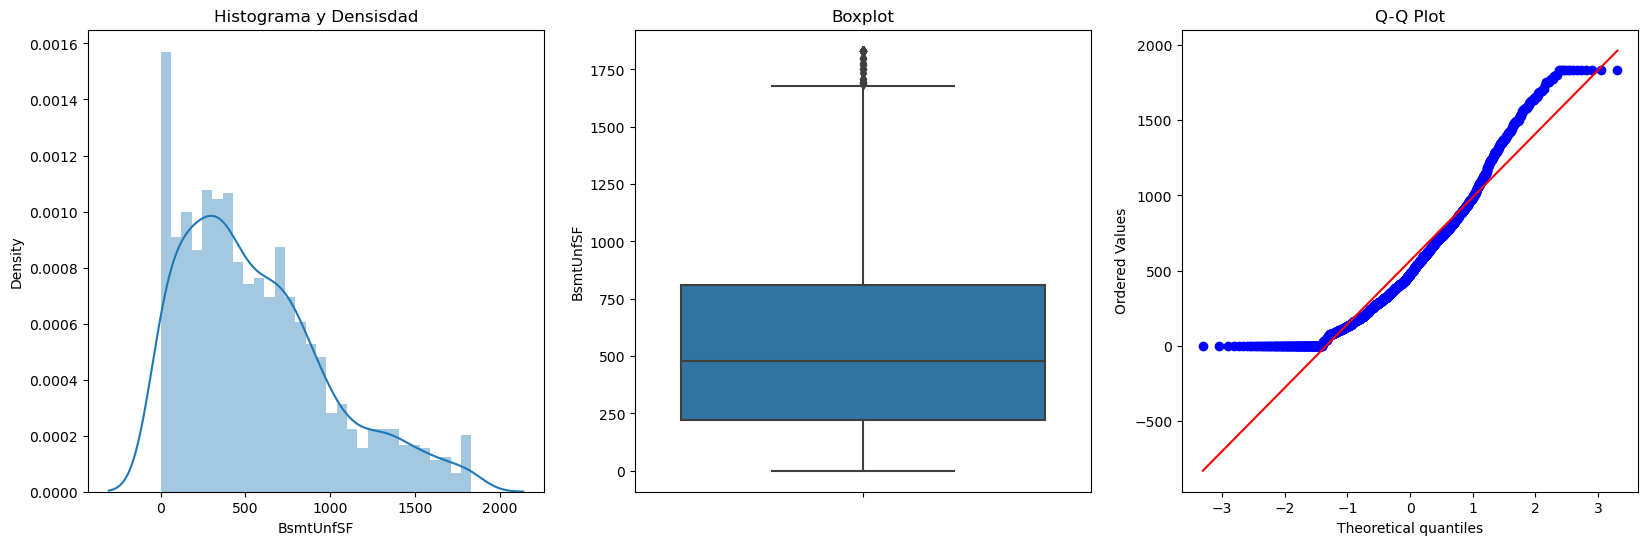

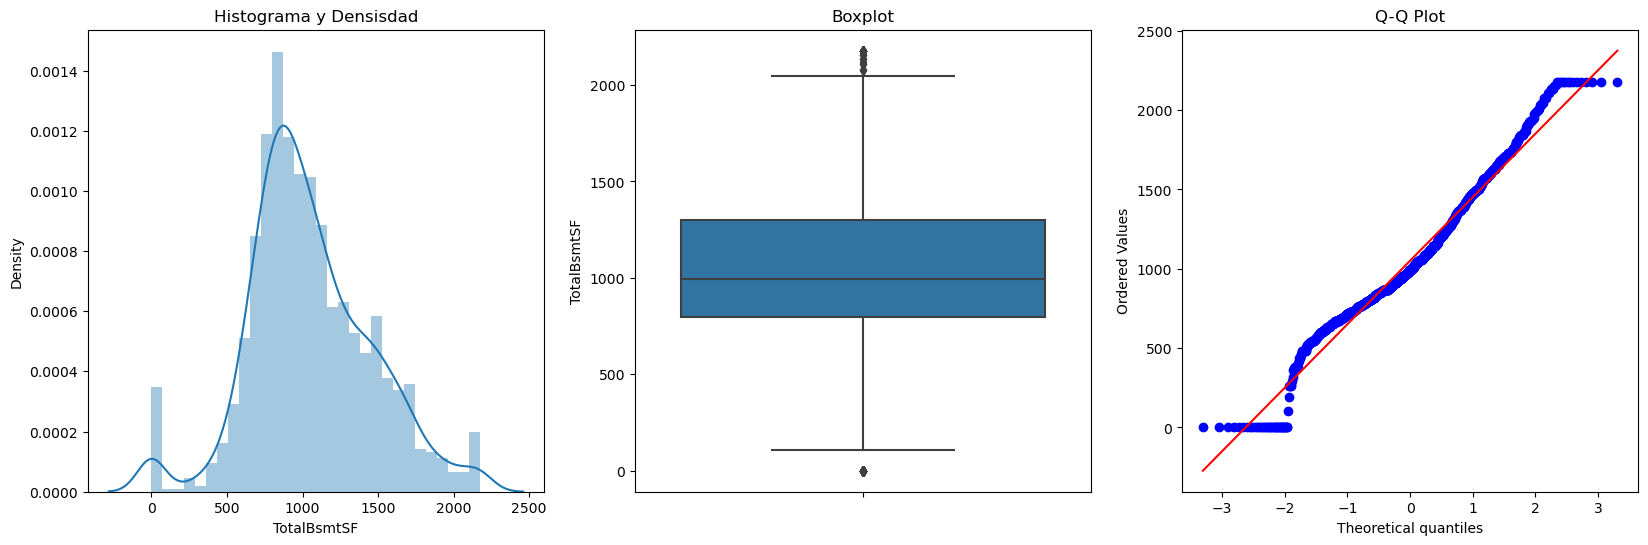

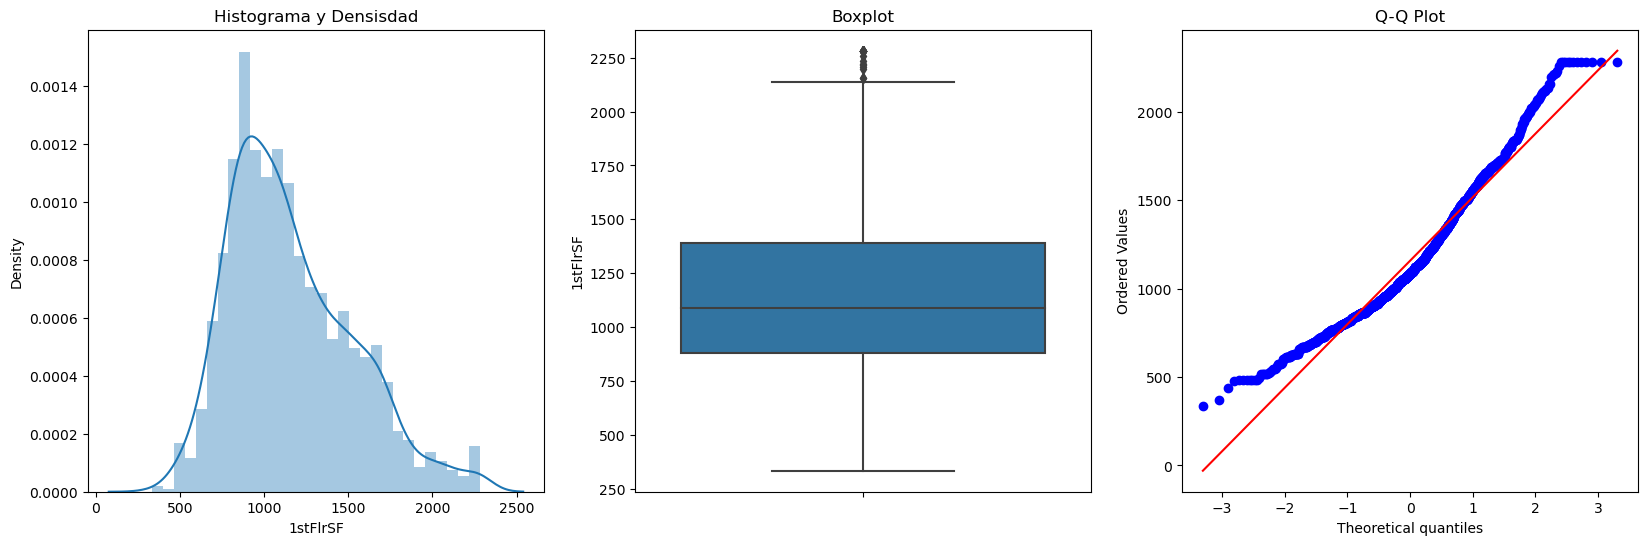

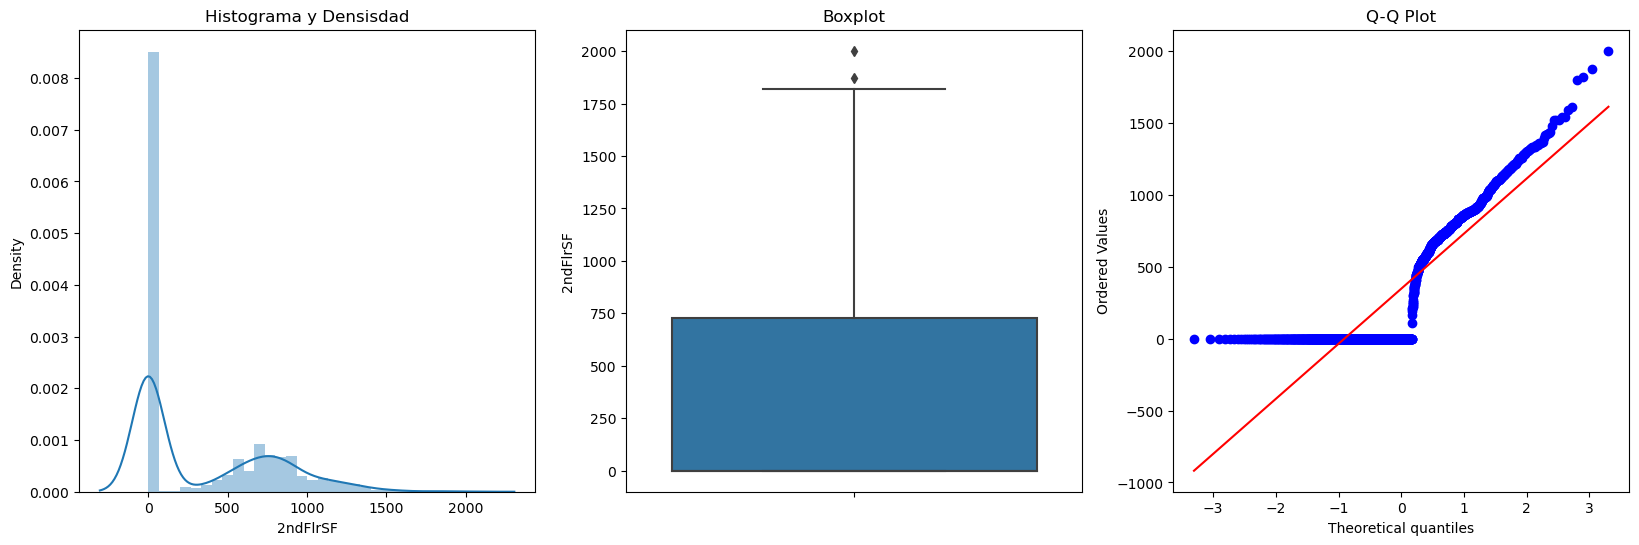

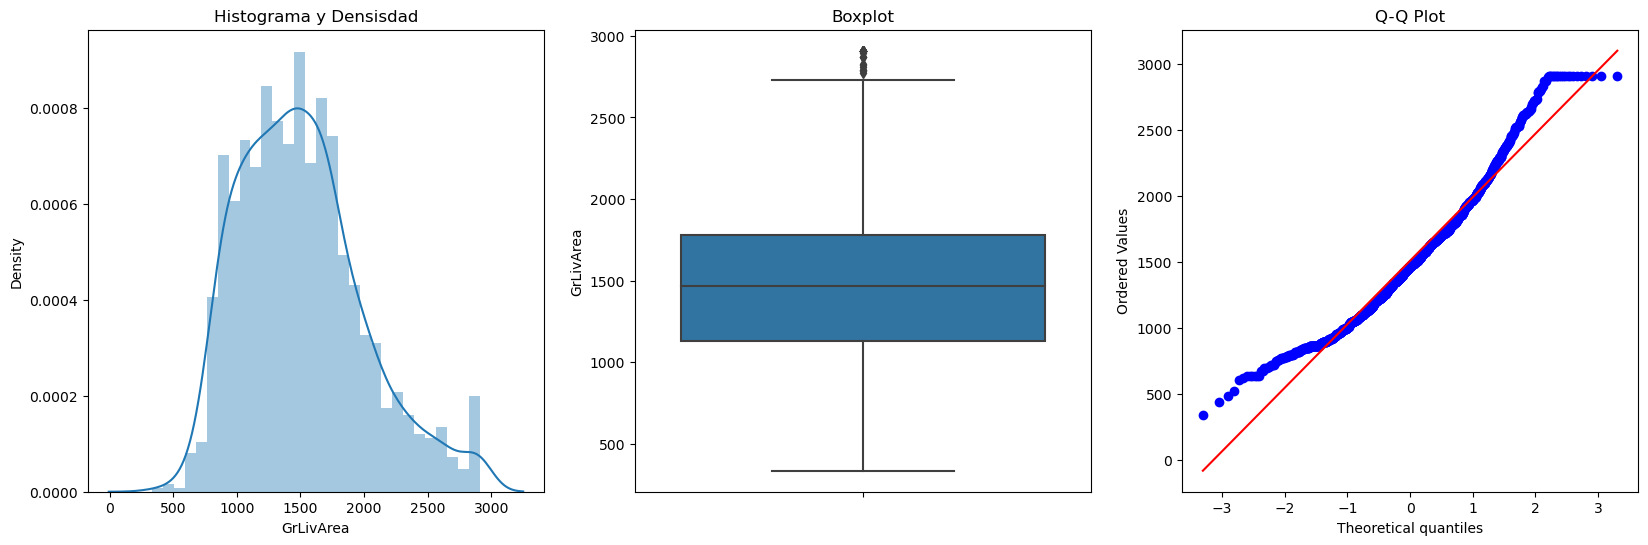

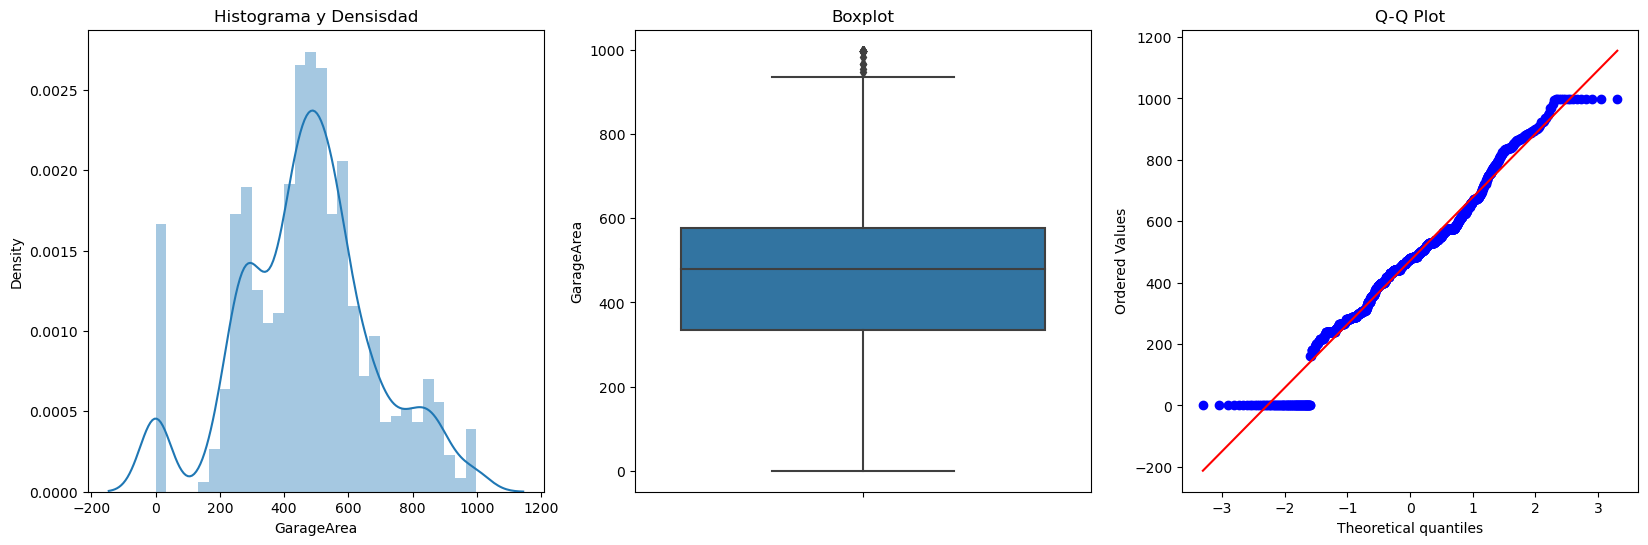

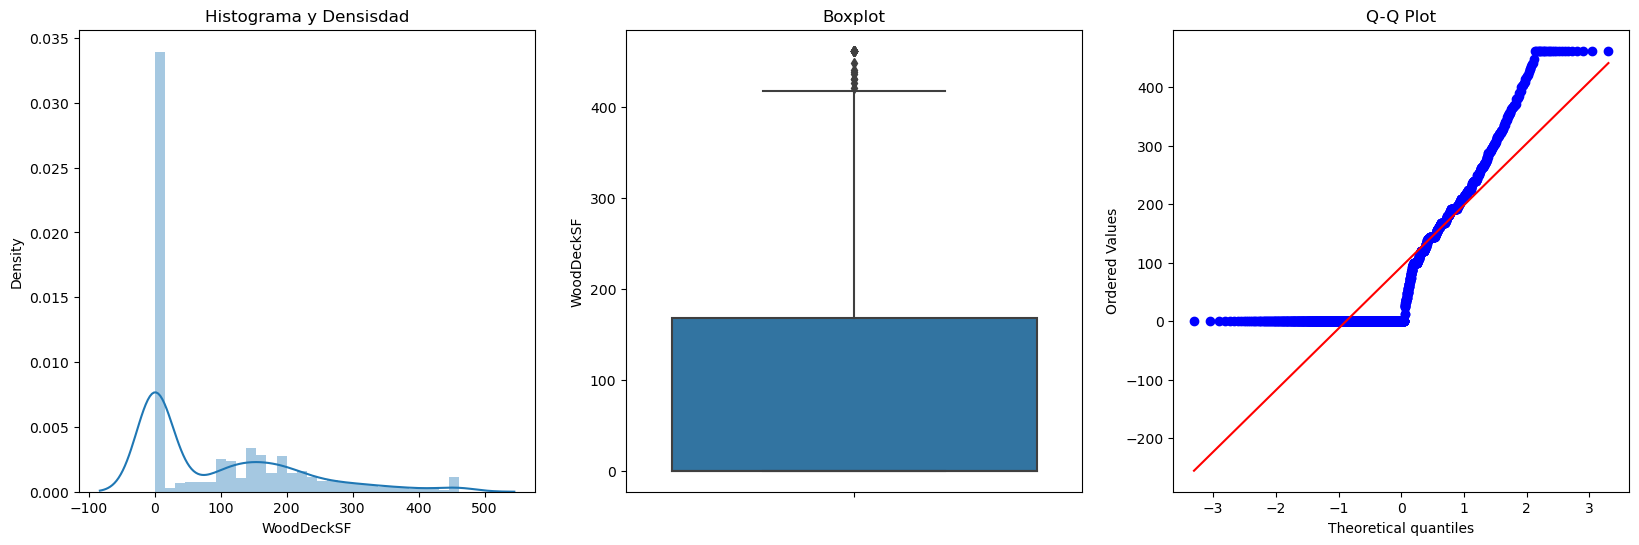

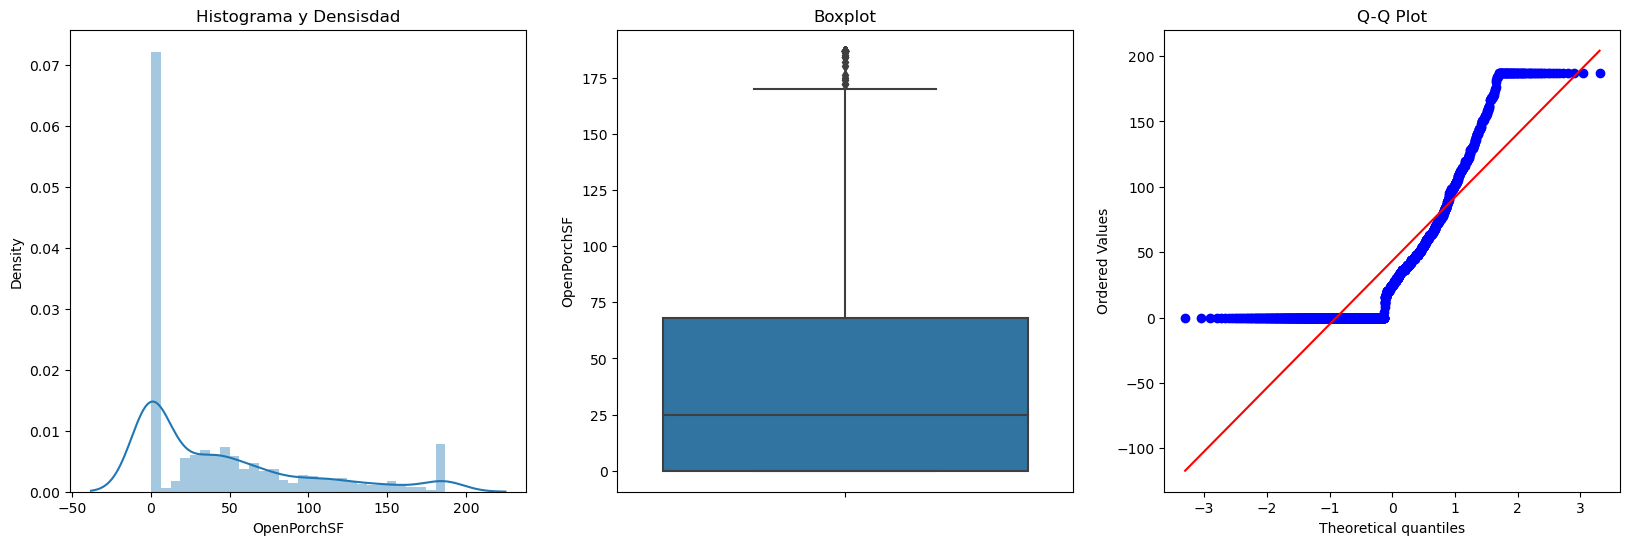

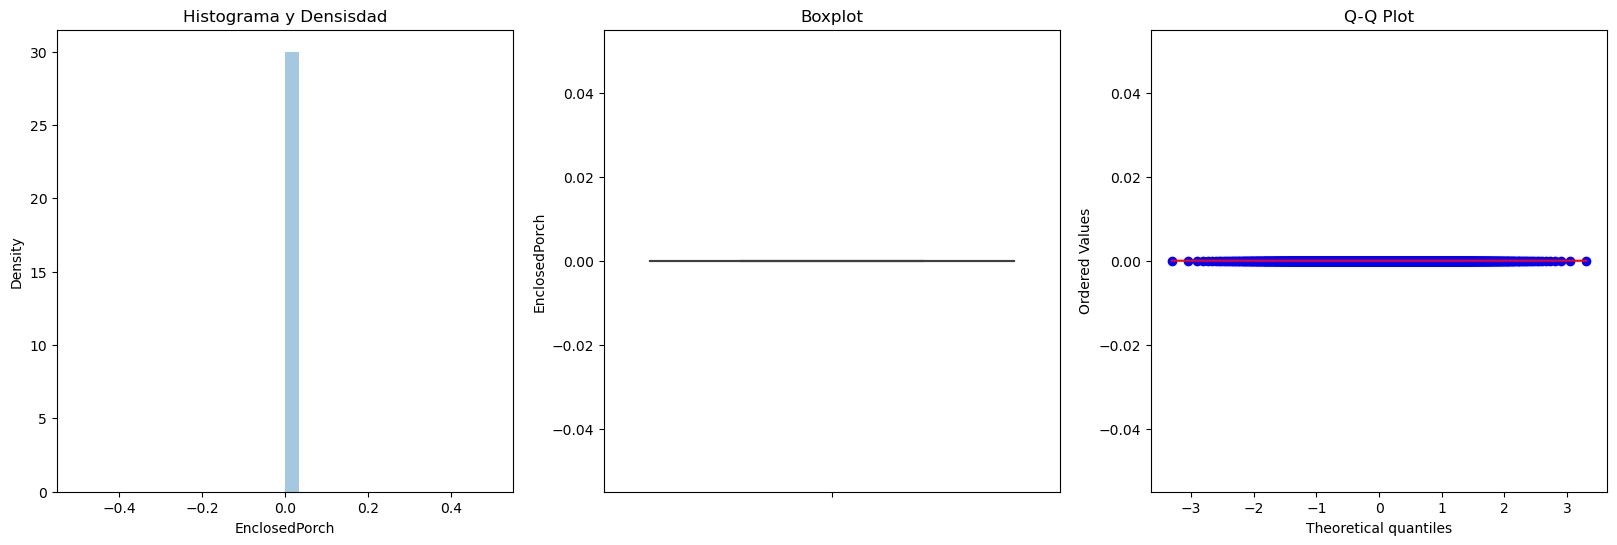

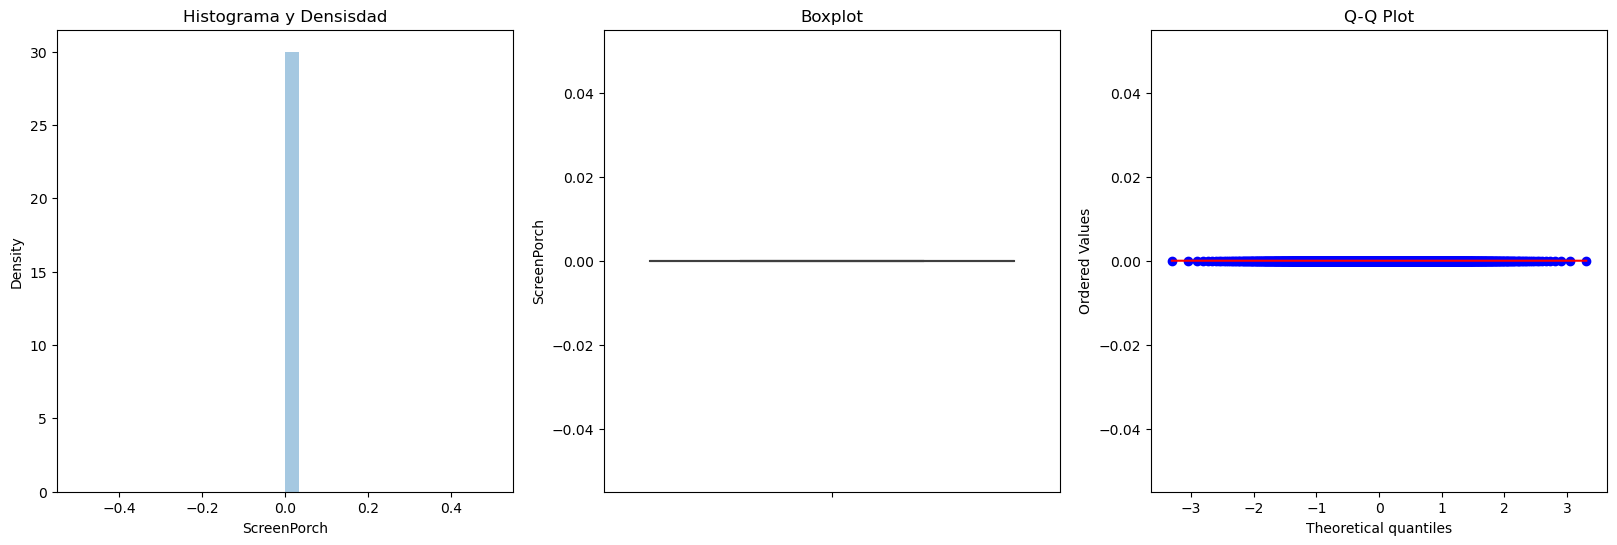

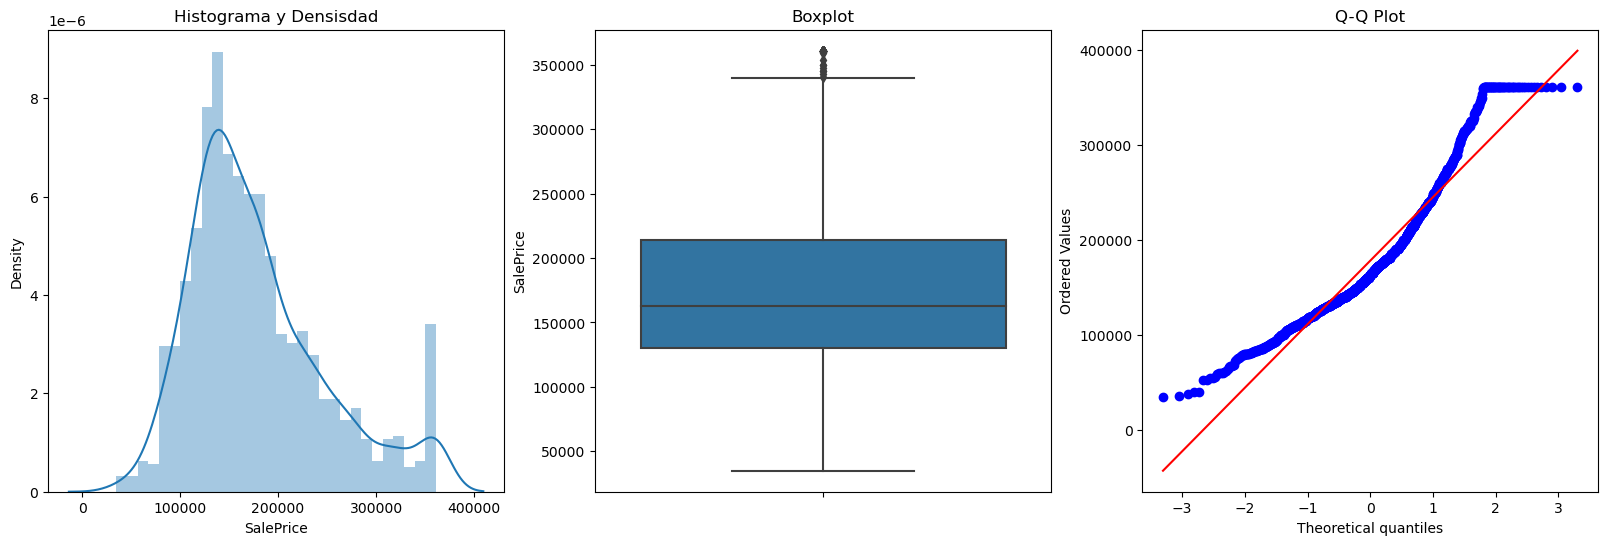

In [477]:
for col in continuas:
    plotDistBoxQQ(dataHP_Final, col)

Data final ya con tratamiento para outliers

In [479]:
dataHP_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   uint8  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   uint8  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   float64
 18  YearRemo